In [634]:
import xarray as xr

In [635]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [636]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [637]:
import datetime

In [638]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [639]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [640]:
plot_path = Path('Plots')

In [641]:
def make_fn_eval(case,_type):
    #_x = v_x.split('(')[0]
    #_y = v_y.split('(')[0]
    f = f'evalOA_echam_{case}_{_type}.png'
    return plot_path /f

In [642]:
plot_path.mkdir(exist_ok=True, parents=True)

## EBAS OA timeseries:

In [643]:
    download_link= 'http://ebas-data.nilu.no/DataSets.aspx?stations=FI0050R&InstrumentTypes=aerosol_mass_spectrometer&fromDate=1970-01-01&toDate=2021-12-31'

## Read in model data. 

In [644]:
model_lev_i=-1

In [645]:
models = ['ECHAM-SALSA','NorESM']

stations = ['SMR', 'SGP']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

In [646]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

In [647]:
import seaborn as sns
import matplotlib.pyplot as plt

In [648]:
import numpy as np

In [649]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [650]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [651]:
from_t2 = '2015-01-01'
to_t2 = '2015-02-01'

In [652]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### Load echam-salsa data

#### Settings:

In [653]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [654]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
from_time = '2012-01'
to_time = '2012-02'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

In [655]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-06-03 18:00:49,658 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-06-03 18:00:49,658 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


#### Variables

In [656]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
'emi_monot_bio',
'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
] 

In [657]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [658]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

2022-06-03 18:00:49,864 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/LIMON_gas_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/SABIN_gas_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/MYRC_gas_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/CARENE3_gas_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/ISOP_gas_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/VBS0_gas_SALSA_BSOA_feedba

In [660]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

### LOAD NORESM

#### Settings:

In [661]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [662]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [663]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

#### Cases:

In [664]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [665]:
case_mod = 'OsloAero_intBVOC_f19_f19_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

#### Variables

In [666]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [667]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [668]:
from_t2

'2015-01-01'

In [669]:
to_t2

'2019-01-01'

In [670]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [671]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-06-03 18:01:10,159 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [672]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-06-03 18:01:10,997 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [673]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [674]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [675]:
dic_ds = {case_mod: ds_comb}

In [676]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [677]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

# SELECT STATION for models


In [678]:
dic_st_mod_ca = dict()

In [679]:
for st in stations:
    dic_st_mod_ca[st] = dict()
    for mod in dic_mod_ca.keys():
        dic_st_mod_ca[st][mod] = dict()
        
        for ca in dic_mod_ca[mod].keys():
            dic_st_mod_ca[st][mod][ca] = dic_mod_ca[mod][ca].sel(station=st)
            dic_st_mod_ca[st][mod][ca].load()

# Define constants:

In [680]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

standard_air_density = 100*pressure/(R*temperature)

## Renaming  ECHAM-SALSA variables and fixing the time

In [681]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [682]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

## Make dataframes

In [683]:
dic_df_st_mod = dict()
dic_df_st_mod_sm = dict()
for st in stations:
    dic_df_st_mod[st] = dict()    
    dic_df_st_mod_sm[st] = dict()

In [684]:
for st in stations:
    
    
    df, df_sm = ds2df_echam(dic_st_mod_ca[st]['ECHAM-SALSA'][case_name_echam], take_daily_median=False, model_lev_i =model_lev_i)
    df.index = df.reset_index()['time'].apply(fix_echam_time)
    df
    dic_df_st_mod[st]['ECHAM-SALSA']= df.copy()    
    dic_df_st_mod_sm[st]['ECHAM-SALSA']= df_sm

N3
N50
N100
N200
N250
N500
ORG_mass_conc
VBS1_gas_conc
VBS0_gas_conc
VBS10_gas_conc
cwp
N3
N50
N100
N200
N250
N500
ORG_mass_conc
VBS1_gas_conc
VBS0_gas_conc
VBS10_gas_conc
cwp


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

### NorESM

index = dic_st_mod_ca[st]['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp'].to_dataframe().index#.get_level_values(0).name

index

In [685]:

for st in stations:
     
        
    dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_st_mod_ca[st]['NorESM'], model_lev_i=model_lev_i, 
                                            return_summer_median=True, take_daily_median=False)

    dic_df_st_mod[st]['NorESM']= dic_df[case_noresm].copy()    
    dic_df_st_mod_sm[st]['NorESM']= dic_df_sm[case_noresm].copy()

hey
<xarray.Dataset>
Dimensions:     (time: 61345, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station     <U3 'SMR'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/39)
    ACTREL      (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BC_A        (time, lev) float32 4.068e-13 2.567e-13 ... 1.212e-11 1.141e-11
    BC_AC       (time, lev) float32 2.354e-17 1.01e-17 ... 3.25e-13 4.377e-14
    BC_AI       (time, lev) float32 3.951e-18 1.75e-18 ... 7.688e-13 7.346e-13
    BC_AX       (time, lev) float32 3.118e-14 1.945e-14 ... 1.967e-12 1.709e-12
    BC_N        (time, lev) float32 4.131e-14 2.532e-14 ... 1.052e-11 7.518e-12
    ...          ...
    SS_A1       (time, lev) float32 1.795e-23 1.613e-22 ... 1.355e-11 1.773e-12
    SS_A2       (time, lev) float32 1.167e-25 1.021e-25 ... 7.13e-11 9.316e-12
    SS_A3       (time, lev) float32 1.132e-28 1.726e-28 ... 1.958e-10 2.557e-11
 

## SHIFT TIME to local time for models

In [686]:
dic_station2time_offset = dict(SMR=3, SGP = -6)#time_shift

In [687]:
for st in stations:
    for mo in models:
        ts = dic_station2time_offset[st]
        ind = dic_df_st_mod[st][mo].index
        dic_df_st_mod[st][mo].index = ind + datetime.timedelta(hours=ts)

### Check: 

In [688]:
for mo in models:
    for st in stations: 
        print(dic_df_st_mod[st][mo].index[0:4])

DatetimeIndex(['2012-07-01 03:00:00', '2012-07-01 04:00:00',
               '2012-07-01 05:00:00', '2012-07-01 06:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-06-30 18:00:00', '2012-06-30 19:00:00',
               '2012-06-30 20:00:00', '2012-06-30 21:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-07-01 03:00:00', '2012-07-01 04:00:00',
               '2012-07-01 05:00:00', '2012-07-01 06:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-06-30 18:00:00', '2012-06-30 19:00:00',
               '2012-06-30 20:00:00', '2012-06-30 21:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


# Copy base case into dictionary

In [689]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for st in stations:
    dic_df_pre[st] = dict()
    for mod in models:
        dic_df_pre[st][mod] = dic_df_st_mod[st][mod].copy()

In [690]:
from bs_fdbck.constants import measurements_path
import pandas as pd

# Read ACSM data from Hyytiala

In [691]:
    
def timeround10(dt):
    a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(hours = (dt.hour+a), minutes=b)
    nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year,dt.month, dt.day,) + tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt



def fix_matlabtime(t):
    ind = pd.to_datetime(t-719529, unit='D')
    ind_s = pd.Series(ind)
    return ind_s.apply(timeround10)
    
    


In [692]:
fn_liine = measurements_path / 'ACSM_DEFAULT.mat'

In [693]:
columns = ['time', 'Org','SO4','NO3','NH4','Chl']

<AxesSubplot:xlabel='time'>

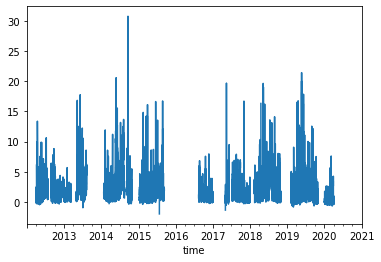

In [694]:
import scipy.io as sio
test = sio.loadmat(fn_liine)

df_lii = pd.DataFrame(test['ACSM_DEFAULT'], columns=columns)#.set_index('time')

df_lii['time'] = fix_matlabtime(df_lii['time']) + datetime.timedelta(hours=1)

df_lii = df_lii.set_index('time')

df_lii['Org'].plot()

In [695]:
len(df_lii['Org'][df_lii['Org']<0])#.plot()

723

In [696]:
obs_hyy_s = df_lii[(df_lii.index.month==7) |(df_lii.index.month==8)]

### READ FROM SGP

In [697]:
import pandas as pd

In [698]:
from bs_fdbck.constants import measurements_path

In [699]:
measurements_path

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data')

In [700]:
path_acsm_SGP = measurements_path/'ARM_data' /'watson'/'ACSM'


fl = list(path_acsm_SGP.glob('*.csv'))

fl.sort()

df_list = []
for f in fl:
    df_list.append(pd.read_csv(f, index_col=1))

_df_acsm_SGP = pd.concat(df_list)

_df_acsm_SGP.index = pd.to_datetime(_df_acsm_SGP.index)

df_acsm_SGP =  _df_acsm_SGP.resample('h').mean()

df_acsm_SGP.index = df_acsm_SGP.index.rename('time')

df_acsm_SGP

,Org,NO3,SO4,NH4,Chl
time,,,,,
2011-01-01 00:00:00,0.105956,0.229458,0.174238,0.236372,0.003515
2011-01-01 01:00:00,0.218333,0.167305,0.266792,0.065027,0.010757
2011-01-01 02:00:00,0.185362,0.215106,0.143831,0.135154,0.008068
2011-01-01 03:00:00,0.278828,0.216175,0.102955,0.061176,0.009538
2011-01-01 04:00:00,0.305227,0.206229,0.127528,0.126710,0.013873
...,...,...,...,...,...
2020-01-05 18:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-05 19:00:00,0.181320,0.020700,0.028657,-0.007856,0.002740
2020-01-05 20:00:00,0.145849,0.039624,0.023381,0.063025,0.002264


## Change from UTC to local: -6

In [701]:
ind = df_acsm_SGP.index 
df_acsm_SGP.index = ind + datetime.timedelta(hours=-6)

In [702]:
df_acsm_SGP

,Org,NO3,SO4,NH4,Chl
time,,,,,
2010-12-31 18:00:00,0.105956,0.229458,0.174238,0.236372,0.003515
2010-12-31 19:00:00,0.218333,0.167305,0.266792,0.065027,0.010757
2010-12-31 20:00:00,0.185362,0.215106,0.143831,0.135154,0.008068
2010-12-31 21:00:00,0.278828,0.216175,0.102955,0.061176,0.009538
2010-12-31 22:00:00,0.305227,0.206229,0.127528,0.126710,0.013873
...,...,...,...,...,...
2020-01-05 12:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-05 13:00:00,0.181320,0.020700,0.028657,-0.007856,0.002740
2020-01-05 14:00:00,0.145849,0.039624,0.023381,0.063025,0.002264


## Select summer: 

In [703]:
JA_months = ((df_acsm_SGP.index.month==7 ) |  (df_acsm_SGP.index.month==8 ) )

df_acsm_SGP_sum = df_acsm_SGP[JA_months]

## Put observations in dic: 

In [704]:
dic_df_obs_st = dict()
dic_df_obs_st['SMR'] = obs_hyy_s
dic_df_obs_st['SGP'] = df_acsm_SGP_sum

# Set up dic with all OA values from models

In [705]:
dic_mod_oa = dict()
#dic_mod_soa = dict()
dic_mod_all = dict()

for st in stations:

    dic_mod_oa[st] = dict()
    #dic_mod_soa[mod] = dict()
    dic_mod_all[st] = dict()
    for mod in mod: 
        dic_mod_oa[st][mod] = dict()
        #dic_mod_soa[mod][ca] = dict()
        dic_mod_all[st][mod] = dict()
    
    
for st in stations:
    for mo in models:
        _df = dic_df_st_mod[st][mo]
        dic_mod_oa[st][mo] =_df['OA']
        #dic_mod_soa[mo][ca][i] =_df['SOA']
        dic_mod_all[st][mo] =_df
    



(390048.0, 390792.0)

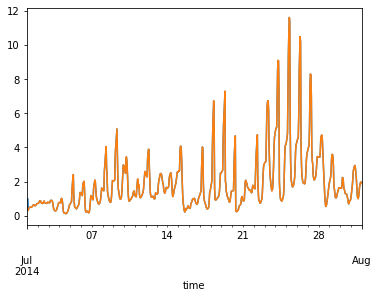

In [706]:
dic_df_pre['SMR']['ECHAM-SALSA'].resample('h').ffill()['OA'].plot()         
dic_df_pre['SMR']['ECHAM-SALSA']['OA'].plot()
plt.xlim(['2014-07','2014-08'])

# Merge with observations in same dictionary!

In [707]:
dic_df_obs_relab_st = dict()
for st in stations:
    _df = dic_df_obs_st[st]
    df_obs_relabel = pd.DataFrame()
    for col in _df.columns:
        df_obs_relabel[f'{col}_obs'] = _df[col]
    dic_df_obs_relab_st[st] = df_obs_relabel.copy()

In [708]:
df_obs_relabel

,Org_obs,NO3_obs,SO4_obs,NH4_obs,Chl_obs
time,,,,,
2011-07-01 00:00:00,3.635350,0.186443,1.482565,0.293110,0.006948
2011-07-01 01:00:00,4.279880,0.345634,1.534270,0.349417,0.030192
2011-07-01 02:00:00,4.210115,0.318369,1.973195,0.358676,0.018901
2011-07-01 03:00:00,4.234960,0.299234,2.071670,0.419805,0.002615
2011-07-01 04:00:00,4.339485,0.296029,2.068635,0.419103,0.002307
...,...,...,...,...,...
2019-08-31 19:00:00,1.799810,0.078597,0.407643,0.164439,0.003547
2019-08-31 20:00:00,1.909160,0.089508,0.316795,0.084166,0.004412
2019-08-31 21:00:00,1.973700,0.123707,0.557770,0.161994,0.004783


In [709]:
for st in stations: 
    for mod in models:
        _df_mod = dic_df_obs_relab_st[st]['Org_obs']
        df_mod = dic_df_pre[st][mod].resample('h').ffill()
        
        _df_merged = pd.merge(df_mod, _df_mod, right_on='time', left_on='time')
        _df_merged['year'] = _df_merged.index.year
        dic_df_st_mod[st][mod]= _df_merged

In [710]:
dic_mask_obs_OA = dict()
for st in stations:
    mask_obs_OA = dic_df_st_mod[st][mod]['Org_obs'].notnull()
    dic_df_st_mod[st]['mask_obs_OA'] = mask_obs_OA
    dic_mask_obs_OA[st] = mask_obs_OA.copy()

In [711]:
dic_df_obs_st[st]

,Org,NO3,SO4,NH4,Chl
time,,,,,
2011-07-01 00:00:00,3.635350,0.186443,1.482565,0.293110,0.006948
2011-07-01 01:00:00,4.279880,0.345634,1.534270,0.349417,0.030192
2011-07-01 02:00:00,4.210115,0.318369,1.973195,0.358676,0.018901
2011-07-01 03:00:00,4.234960,0.299234,2.071670,0.419805,0.002615
2011-07-01 04:00:00,4.339485,0.296029,2.068635,0.419103,0.002307
...,...,...,...,...,...
2019-08-31 19:00:00,1.799810,0.078597,0.407643,0.164439,0.003547
2019-08-31 20:00:00,1.909160,0.089508,0.316795,0.084166,0.004412
2019-08-31 21:00:00,1.973700,0.123707,0.557770,0.161994,0.004783


In [712]:
dic_df_OA_all = dict()
dic_df_OAG_all = dict()

for st in stations:
    _df_obs = dic_df_obs_st[st]['Org'].rename('Obs')

    df_OA_all = pd.DataFrame(_df_obs)
    df_OAG_all = pd.DataFrame(_df_obs)

    for mod in models:
        print(mod)
        df_OA_all[mod] = dic_df_st_mod[st][mod]['OA']
        df_OAG_all[mod] = dic_df_st_mod[st][mod]['OAG']


    df_OA_all = df_OA_all[df_OA_all[mod].notna()]
    df_OA_all = df_OA_all[df_OA_all['Obs'].notna()]
    df_OAG_all = df_OAG_all[df_OAG_all[mod].notna()]
    df_OAG_all = df_OAG_all[df_OAG_all['Obs'].notna()]
    dic_df_OA_all[st] = df_OA_all.copy()    
    dic_df_OAG_all[st] = df_OAG_all.copy()

ECHAM-SALSA
NorESM
ECHAM-SALSA
NorESM


In [713]:
orgname={'NorESM' : 'OA',
         'ECHAM-SALSA': 'OA'}

### Calculate anomaly from daily average

In [714]:
dic_df_anom_OA =dict()
dic_df_anom_OAG =dict()
for st in stations:
    df_OA_all = dic_df_OA_all[st]
    df_OAG_all = dic_df_OAG_all[st]
    dic_df_anom_OA[st] = df_OA_all-df_OA_all.resample('D').mean().resample('h').ffill()
    dic_df_anom_OAG[st] = df_OAG_all-df_OAG_all.resample('D').mean().resample('h').ffill()

In [715]:
linestyle_dic = {
    'Obs': '--',
    'NorESM':'dashdot',
    'ECHAM-SALSA':'-.'
}

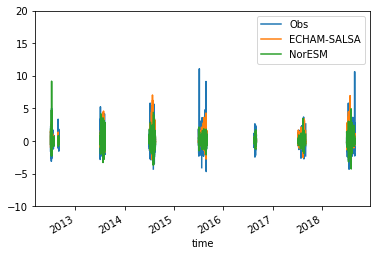

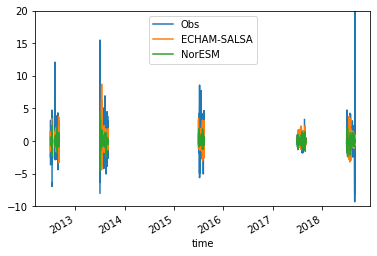

In [716]:
for st in stations:
    
    df_anom_OA = dic_df_anom_OA[st]
    df_anom_OA.plot()
    plt.ylim([-10,20])

<AxesSubplot:xlabel='time'>

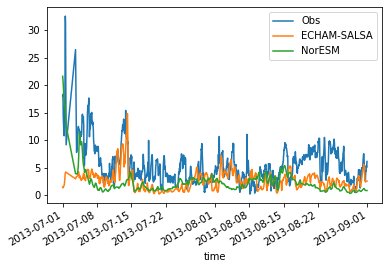

In [717]:
_df = dic_df_OA_all['SGP'].copy()
_df['Obs'] = _df['Obs']#/10
_df.loc['2013':'2014'].plot()

<AxesSubplot:xlabel='time'>

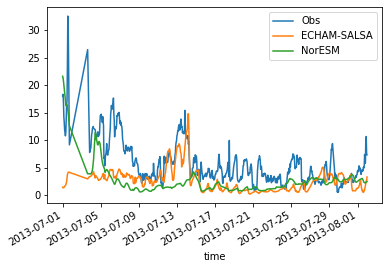

In [718]:
_df = dic_df_OA_all['SGP'].copy()
_df['Obs'] = _df['Obs']#/100
_df.loc['2013-07-01':'2013-08-01'].plot()

<AxesSubplot:xlabel='time'>

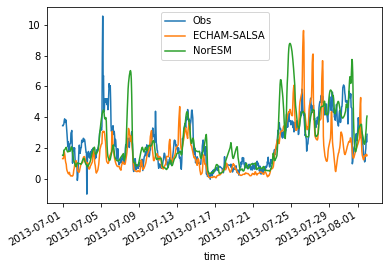

In [719]:
_df = dic_df_OA_all['SMR'].copy()
_df['Obs'] = _df['Obs']
_df.loc['2013-07-01':'2013-08-01'].plot()

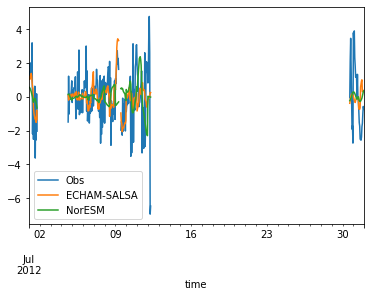

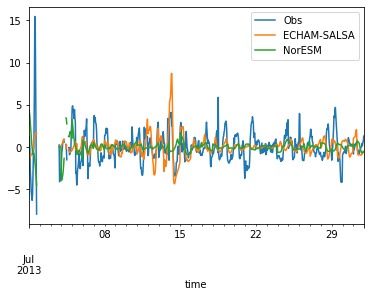

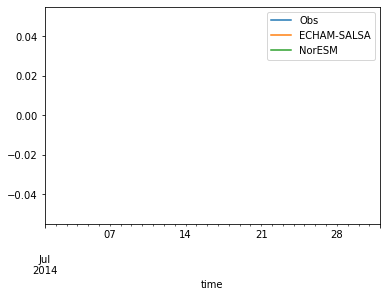

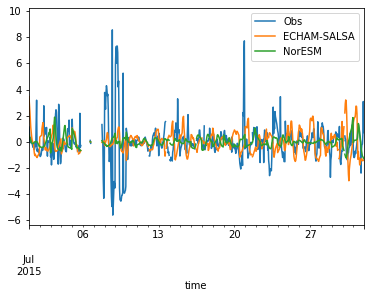

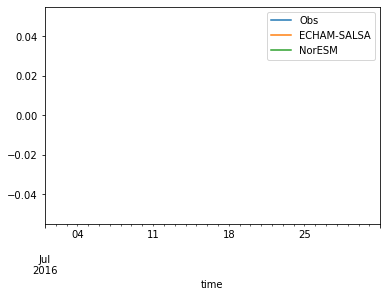

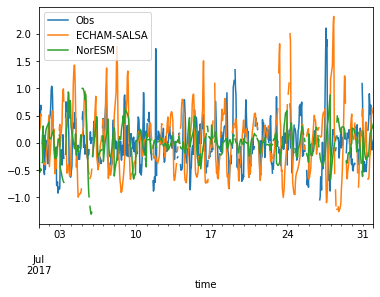

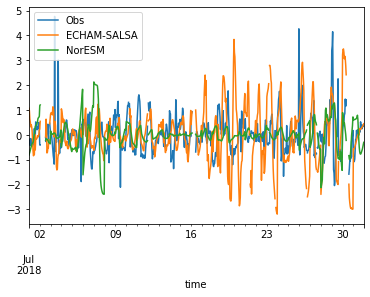

In [720]:
for y in ['2012','2013','2014', '2015','2016','2017','2018']:
    fy = y +'-07'
    ty = y +'-08'
    df_anom_OA.loc[fy:fy].plot()
    plt.show()

In [721]:
_df = dic_df_anom_OA['SGP'].dropna()

<AxesSubplot:xlabel='time'>

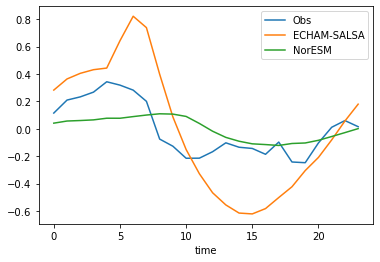

In [722]:
_df.groupby(_df.index.hour).mean().plot()

## Plots daily variability

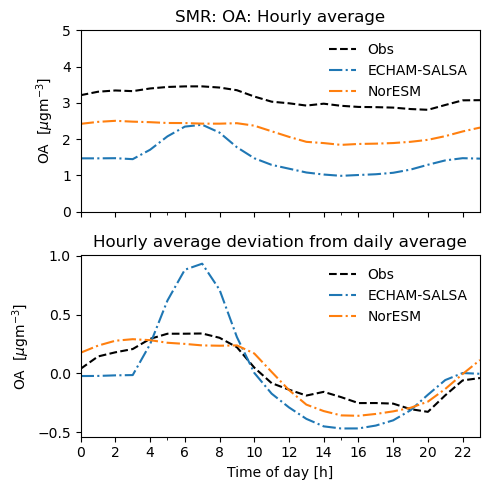

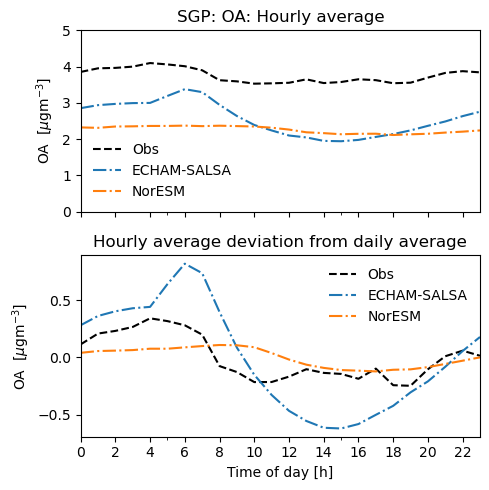

In [554]:
for st in stations: 
    df_anom_OA = dic_df_anom_OA[st]
    df_OA_all = dic_df_OA_all[st]
    fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
    ax = axs[1]

    for mod in df_anom_OA.columns:
        if mod =='Obs': c = 'k'
        else: c=None
        ls = linestyle_dic[mod]
        df_anom_OA[mod].groupby(df_anom_OA.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
    ax.set_title(f"{st}: $OA'$: Average diurnal anomaly") 


    ax = axs[0]


    for mod in df_anom_OA.columns:
        if mod =='Obs': c = 'k'
        else: c=None
        ls = linestyle_dic[mod]
        df_OA_all[mod].groupby(df_OA_all.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
    ax.legend(frameon=False)
    ax.set_title(f"{st}: OA: Hourly average") 

    ax.set_ylim([0,5])

    ax = axs[1]
    ax.set_title("Hourly average deviation from daily average") 

    plt.legend(frameon=False)
    ax.set_xlabel('Time of day [h]')
    for ax in axs: 
        ax.set_ylabel('OA  [$\mu$gm$^{-3}$]')
    plt.tight_layout()

    ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

    ax.set_xlim([0,23])
    fn = make_fn_eval('_'.join(models), f'diurnal_mean_{st}')

    fig.savefig(fn.with_suffix('.png'))
    fig.savefig(fn.with_suffix('.pdf'))

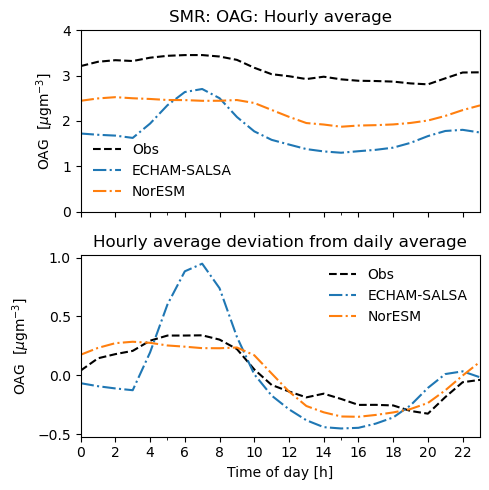

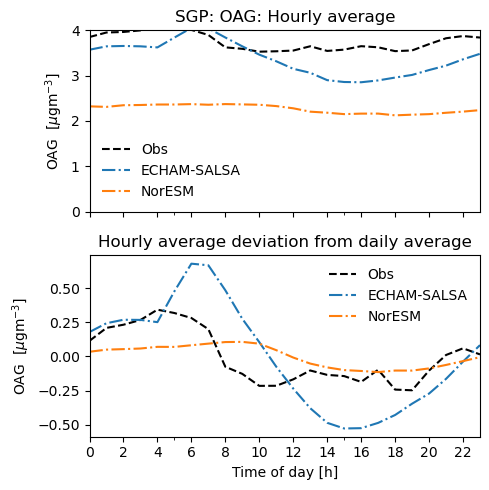

In [439]:
for st in stations: 
    df_anom_OA = dic_df_anom_OAG[st]
    df_OA_all = dic_df_OAG_all[st]
    fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
    ax = axs[1]

    for mod in df_anom_OA.columns:
        if mod =='Obs': c = 'k'
        else: c=None
        ls = linestyle_dic[mod]
        df_anom_OA[mod].groupby(df_anom_OA.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
    ax.set_title(f"{st}: $OA'$: Average diurnal anomaly") 


    ax = axs[0]


    for mod in df_anom_OA.columns:
        if mod =='Obs': c = 'k'
        else: c=None
        ls = linestyle_dic[mod]
        df_OA_all[mod].groupby(df_OA_all.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
    ax.legend(frameon=False)
    ax.set_title(f"{st}: OAG: Hourly average") 

    ax.set_ylim([0,4])

    ax = axs[1]
    ax.set_title("Hourly average deviation from daily average") 

    plt.legend(frameon=False)
    ax.set_xlabel('Time of day [h]')
    for ax in axs: 
        ax.set_ylabel('OAG  [$\mu$gm$^{-3}$]')
    plt.tight_layout()

    ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22,])

    ax.set_xlim([0,23])
    fn = make_fn_eval('_'.join(models), f'diurnal_mean_{st}')

    fig.savefig(fn.with_suffix('.png'))
    fig.savefig(fn.with_suffix('.pdf'))

In [440]:
def make_cbar(fig, label):
    

    levs = [1000]+[np.round(dic_p[i]) for i in range(1,num_levs)] + [850]

    levs_bound = [(levs[i]+levs[i+1])/2 for i in np.arange(len(levs)-1)]

    lev_ticks = levs[1:-1][::-1]

    cmap= mpl.colors.ListedColormap(sns.color_palette('viridis_r',6))
    norm= mpl.colors.BoundaryNorm(levs_bound[::-1], len(levs_bound[::-1]))#, clip=True)

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmap), ticks = lev_ticks, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()



In [441]:
def make_cbar(fig, label):
    
    levs = [992.556095123291,
     976.325407391414,
     957.485479535535,
     936.1983984708786,
     912.644546944648,
     887.0202489197254]

    aa = [levs[0]+(levs[0]-levs[1])/2]
    for i in range(len(levs)-1):
        b = (levs[i] + levs[i+1])/2
        aa.append(b)

    aa.append( levs[-1]+(levs[-1]-levs[-2])/2   )

    a1 = aa[0]
    a2 = aa[-1]
    
    
    cmap = plt.get_cmap('plasma_r')

    norm = mpl.colors.Normalize(vmin=a2,vmax=a1)

    cols = [cmap(norm(min(levs, key=lambda x:abs(x-xx)))) for xx in np.linspace(a2,a1,256)]

    cmm = mpl.colors.ListedColormap(cols)
    

    #norm = mpl.colors.Normalize(vmin=993,vmax=886)
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmm), ticks = levs, label=label)
    #cb.ax.set_yticklabels(levs[::-1][:-1])
    cb.ax.invert_yaxis()
    
    return norm, cmm

In [442]:
import matplotlib as mpl

In [444]:
df_OA_all = dic_df_OA_all['SMR'].dropna()

mi = np.min(df_OA_all[df_OA_all['Obs']>0]['Obs'])*15
ma = np.max(df_OA_all[df_OA_all['Obs']>0]['Obs'])
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)

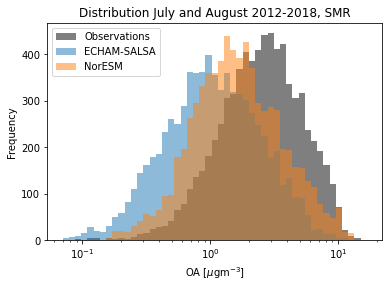

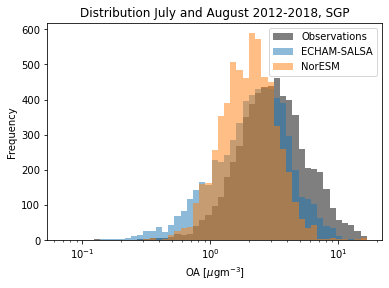

In [447]:
for st in stations: 
    #df_anom_OA = dic_df_anom_OA[st]
    df_OA_all = dic_df_OA_all[st].dropna()


    df_OA_all['Obs'].plot.hist(bins=bins_, alpha=0.5, 
                                     color='k',
                                     label='Observations'
                                    )
    for mo in models:
        df_OA_all[mo].plot.hist(bins=bins_, alpha=0.5, 
                                     #color=None,
                                     label=mo
                                    )
    plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

    plt.xlabel('OA [$\mu$gm$^{-3}$]')

    plt.title(f'Distribution July and August 2012-2018, {st}')

    plt.legend()
    fn = make_fn_eval('noresm_echam',f'hist_{st}')
    plt.savefig(fn, dpi=300)
    plt.savefig(fn.with_suffix('.pdf'), dpi=300)
    plt.show()

<AxesSubplot:xlabel='time'>

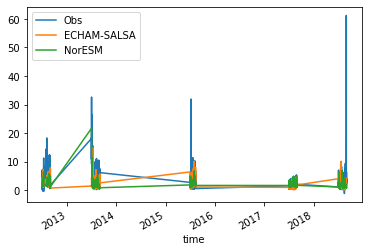

In [448]:
st = 'SGP'
df_OA_all = dic_df_OA_all[st].dropna()

df_OA_all.plot()

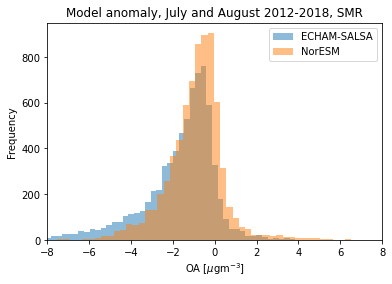

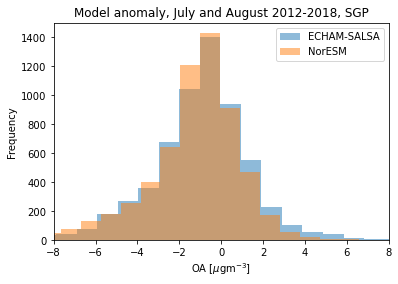

In [450]:
for st in stations: 
    #df_anom_OA = dic_df_anom_OA[st]
    df_OA_all = dic_df_OA_all[st].dropna()

    for mo in models:
        (df_OA_all[mo]-df_OA_all['Obs']).plot.hist(#bins=bins_, 
            alpha=0.5, 
            bins=70,
                                     #color=None,
                                     label=mo
                                    )
    #plt.xscale('log')
    #_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')
    plt.xlim([-8,8])
    plt.xlabel('OA [$\mu$gm$^{-3}$]')

    plt.title(f'Model anomaly, July and August 2012-2018, {st}')

    plt.legend()
    fn = make_fn_eval('diff_hist','hist')
    #plt.savefig(fn, dpi=300)
    #plt.savefig(fn.with_suffix('.pdf'), dpi=300)
    plt.show()

In [101]:
import numpy as np

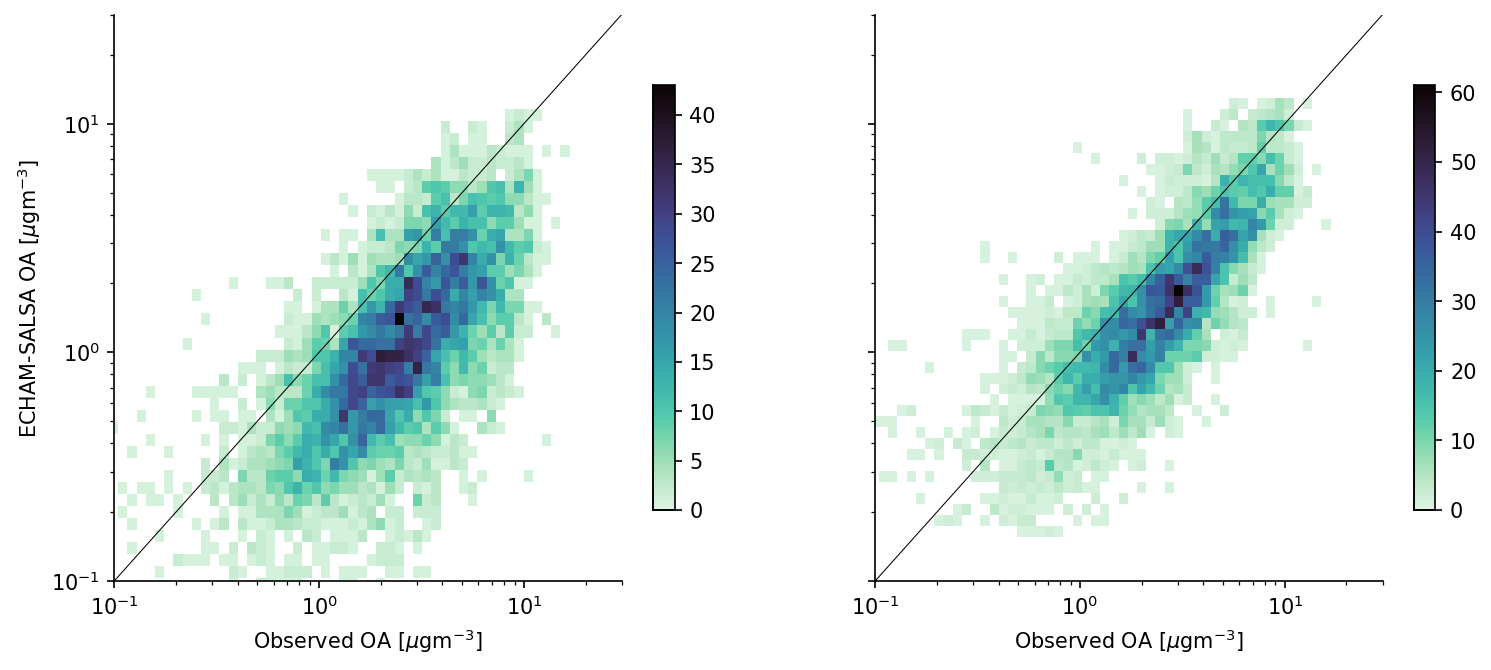

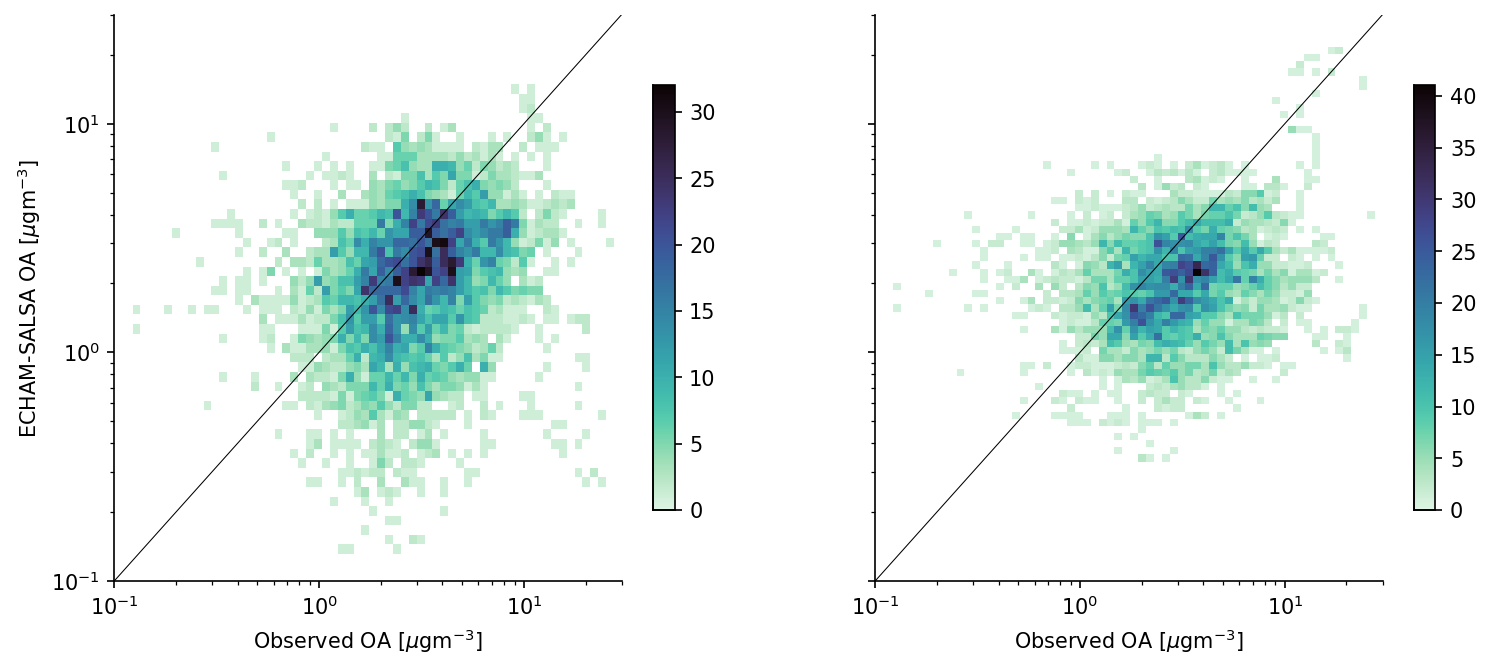

In [463]:
for st in stations: 
    #df_anom_OA = dic_df_anom_OA[st]
    df_OA_all = dic_df_OA_all[st].dropna()
    fig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5],dpi=150, sharex=True)
    ax = axs[0]
    _df = df_OA_all
    _df['hour'] = _df.index.hour
    for mo, ax in zip(models,axs.flatten()):
        sns.histplot(y=mo, x='Obs',#orbins=bins_, alpha=0.5, 
                                    # hue='hour', 
                #col = 'dir',
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                     cbar=True, cbar_kws=dict(shrink=.75),
                
                edgecolors=None,
                 
                data = _df)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([0.1,30])
        ax.set_ylim([0.1,30])

        ax.set_ylabel(f'{mo} OA '+'[$\mu$gm$^{-3}$]')
        ax.set_xlabel('Observed OA [$\mu$gm$^{-3}$]')



        lims = ax.get_xlim()
        ax.plot(lims,lims,'k', linewidth=.5)


    fn = make_fn_eval('_'.join(models),'scatt_OAG')
    sns.despine(fig)
    #fig.savefig(fn, dpi=300)
    #fig.savefig(fn.with_suffix('.pdf'), dpi=300)
    plt.show()

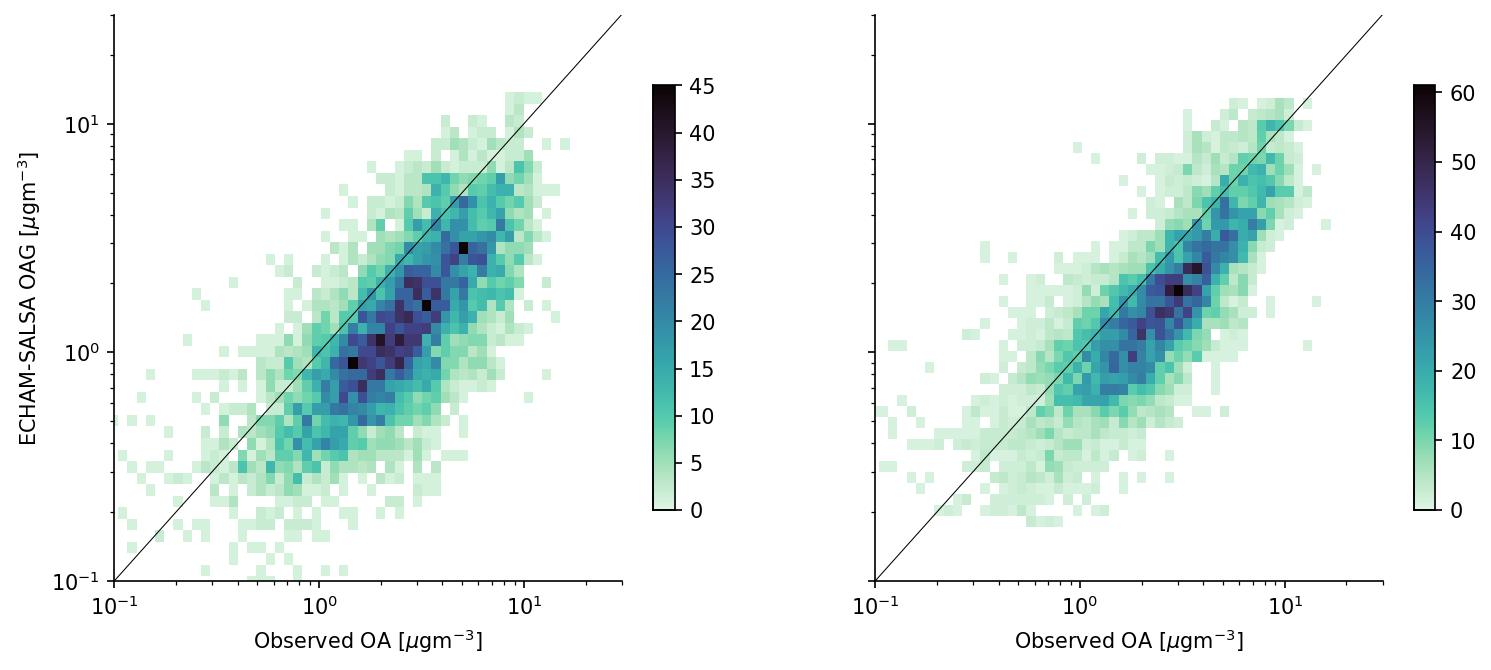

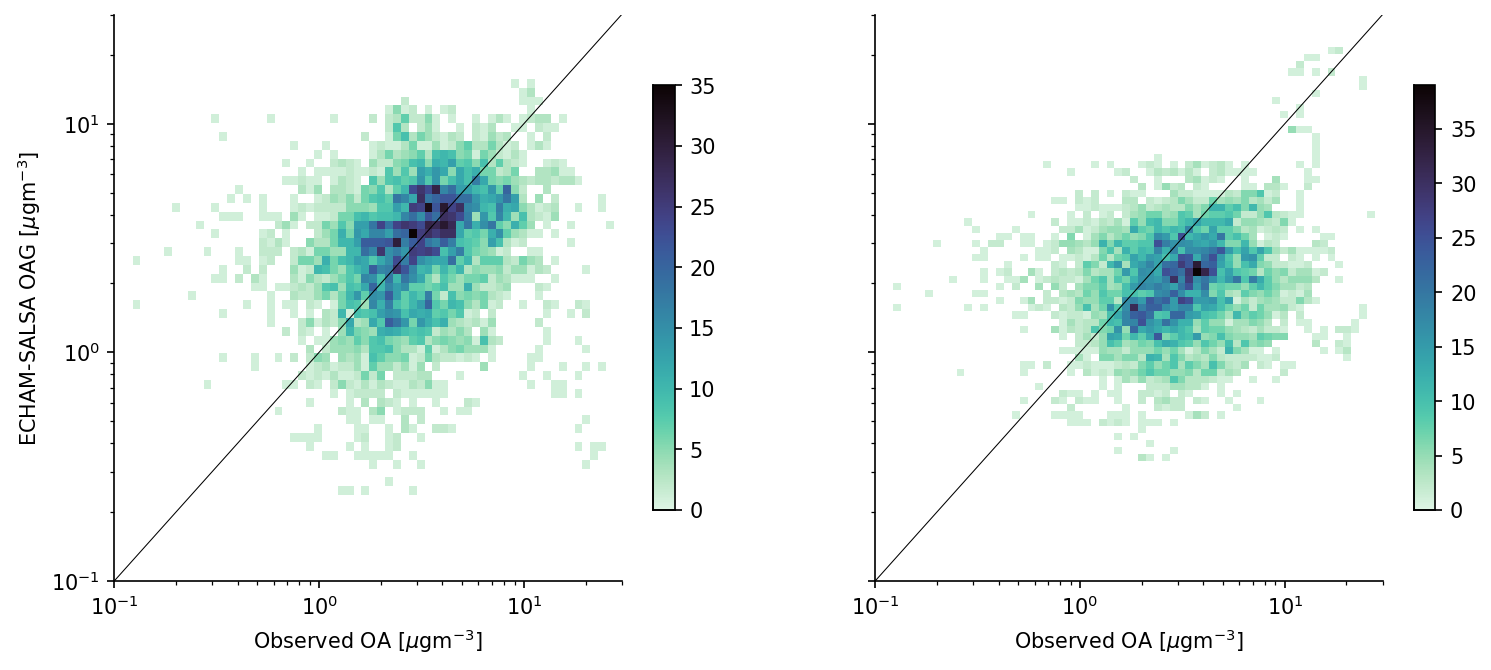

In [462]:
for st in stations: 
    #df_anom_OA = dic_df_anom_OA[st]
    df_OA_all = dic_df_OAG_all[st].dropna()
    fig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5],dpi=150, sharex=True)
    ax = axs[0]
    _df = df_OA_all
    _df['hour'] = _df.index.hour
    for mo, ax in zip(models,axs.flatten()):
        sns.histplot(y=mo, x='Obs',#orbins=bins_, alpha=0.5, 
                                    # hue='hour', 
                #col = 'dir',
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                     cbar=True, cbar_kws=dict(shrink=.75),
                
                edgecolors=None,
                 
                data = _df)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([0.1,30])
        ax.set_ylim([0.1,30])

        ax.set_ylabel(f'{mo} OAG '+'[$\mu$gm$^{-3}$]')
        ax.set_xlabel('Observed OA [$\mu$gm$^{-3}$]')



        lims = ax.get_xlim()
        ax.plot(lims,lims,'k', linewidth=.5)


    fn = make_fn_eval('_'.join(models),'scatt_OAG')
    sns.despine(fig)
    #fig.savefig(fn, dpi=300)
    #fig.savefig(fn.with_suffix('.pdf'), dpi=300)
    plt.show()

In [103]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

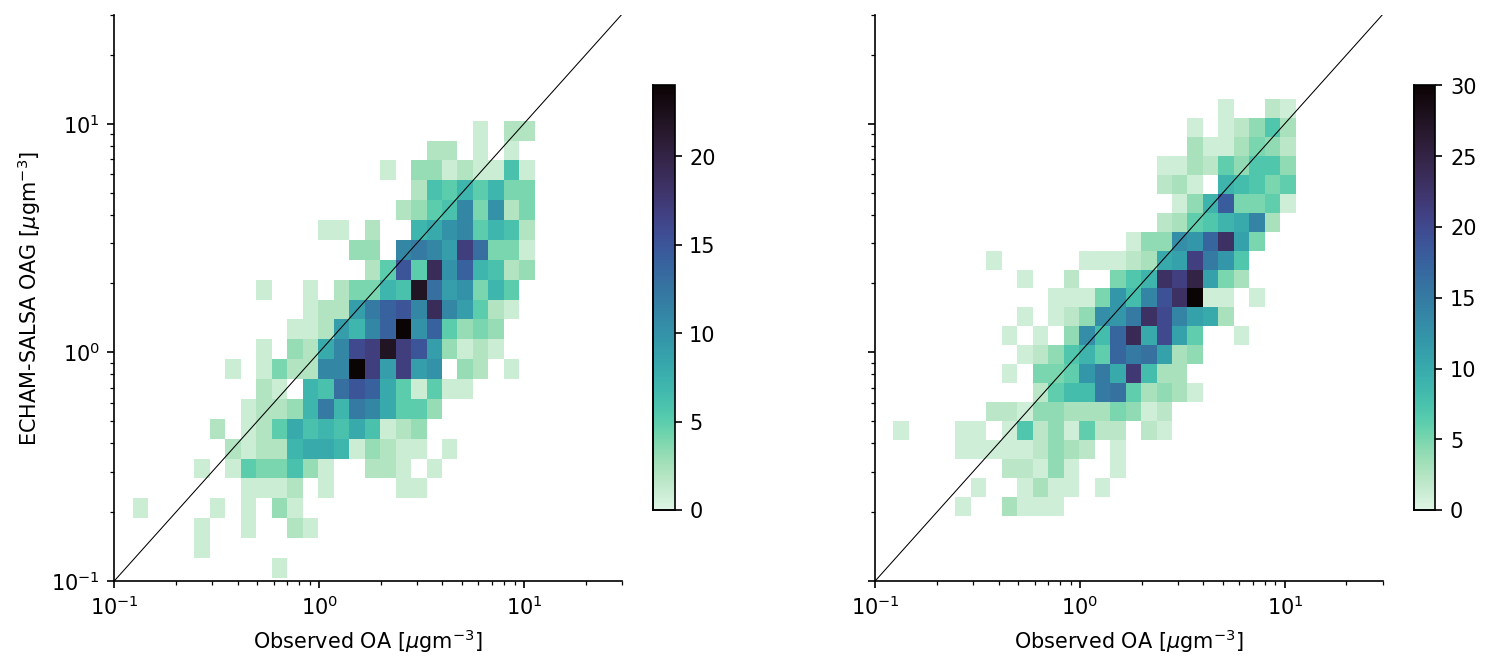

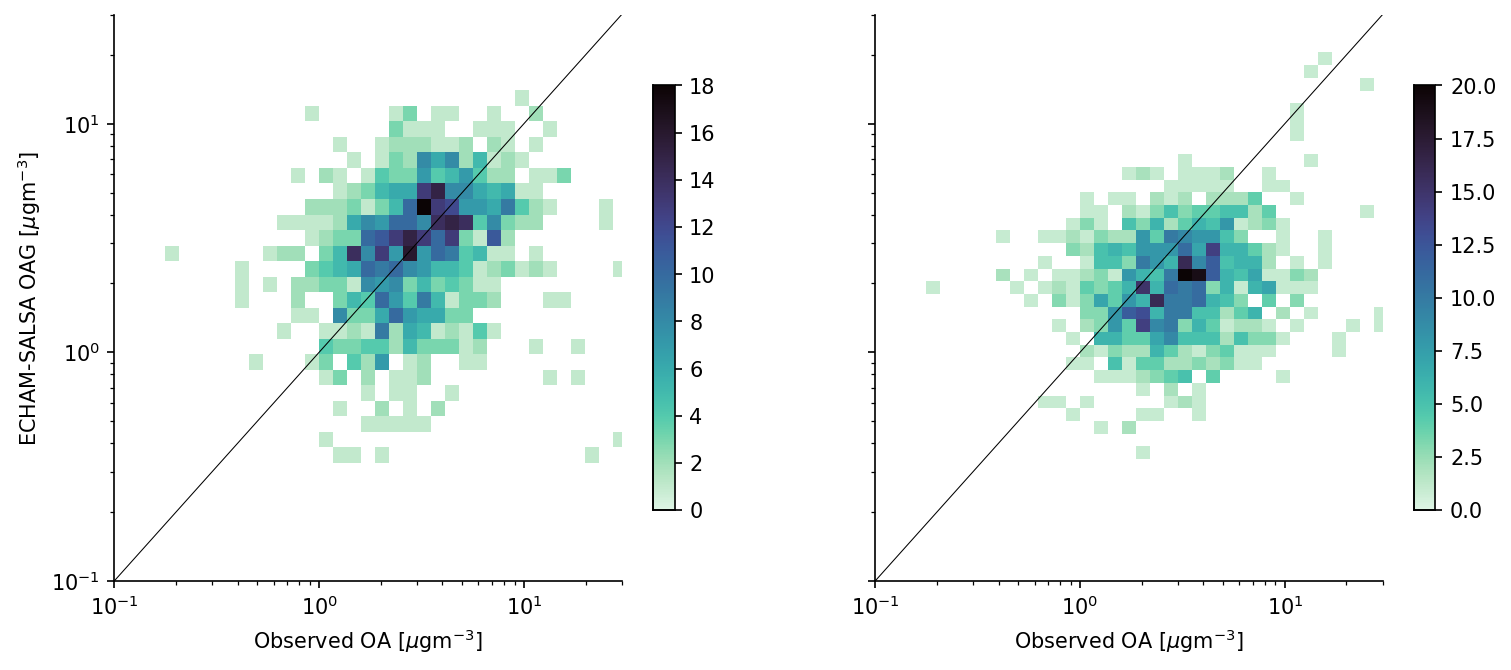

In [461]:
for st in stations: 
    #df_anom_OA = dic_df_anom_OA[st]
    df_OAG_all = dic_df_OAG_all[st].dropna()
    fig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5],dpi=150, sharex=True)
    ax = axs[0]
    _df = df_OAG_all.resample('6H').median()
    _df['hour'] = _df.index.hour

    for mo, ax in zip(models,axs.flatten()):
        sns.histplot(y=mo, x='Obs',#orbins=bins_, alpha=0.5, 
                                    # hue='hour', 
                #col = 'dir',
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                     cbar=True, cbar_kws=dict(shrink=.75),
                
                edgecolors=None,
                 
                data = _df)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([0.1,30])
        ax.set_ylim([0.1,30])

        ax.set_ylabel(f'{mo} OAG '+'[$\mu$gm$^{-3}$]')
        ax.set_xlabel('Observed OA [$\mu$gm$^{-3}$]')



        lims = ax.get_xlim()
        ax.plot(lims,lims,'k', linewidth=.5)


    fn = make_fn_eval('_'.join(models),'scatt_OAG')
    sns.despine(fig)
    #fig.savefig(fn, dpi=300)
    #fig.savefig(fn.with_suffix('.pdf'), dpi=300)
    plt.show()

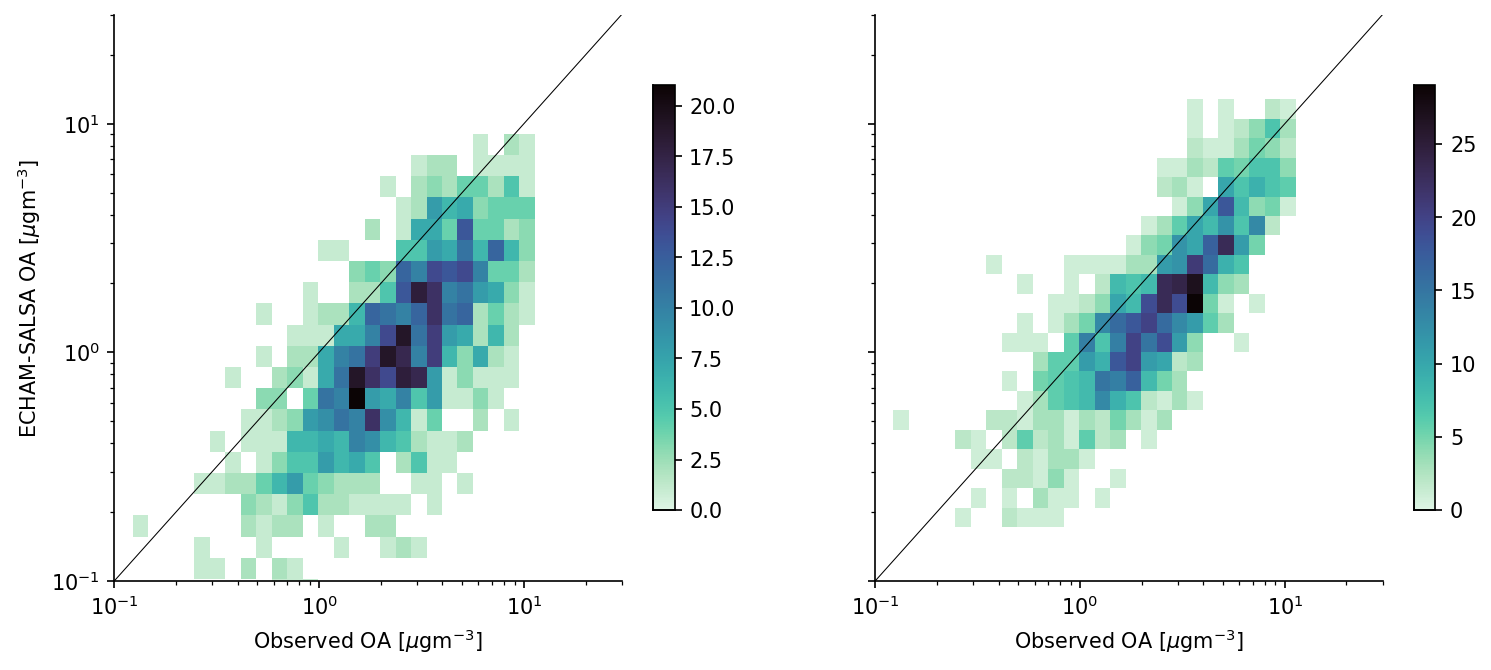

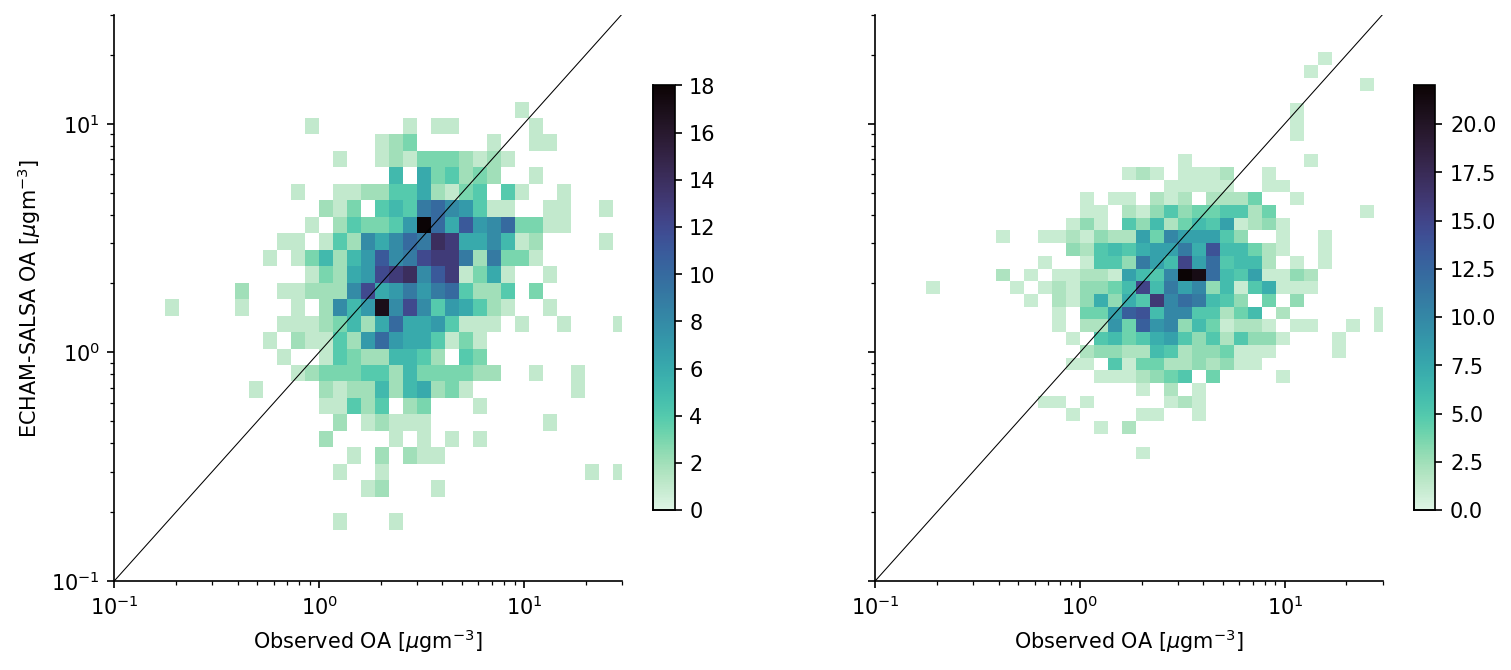

In [460]:
for st in stations: 
    #df_anom_OA = dic_df_anom_OA[st]
    df_OA_all = dic_df_OA_all[st].dropna()
    fig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5],dpi=150, sharex=True)
    ax = axs[0]
    _df = df_OA_all.resample('6H').median()
    _df['hour'] = _df.index.hour

    for mo, ax in zip(models,axs.flatten()):
        sns.histplot(y=mo, x='Obs',#orbins=bins_, alpha=0.5, 
                                    # hue='hour', 
                #col = 'dir',
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                     cbar=True, cbar_kws=dict(shrink=.75),
                
                edgecolors=None,
                 
                data = _df)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([0.1,30])
        ax.set_ylim([0.1,30])

        ax.set_ylabel(f'{mo} OA '+'[$\mu$gm$^{-3}$]')
        ax.set_xlabel('Observed OA [$\mu$gm$^{-3}$]')



        lims = ax.get_xlim()
        ax.plot(lims,lims,'k', linewidth=.5)


    fn = make_fn_eval('_'.join(models),'scatt_OAG')
    sns.despine(fig)
    #fig.savefig(fn, dpi=300)
    #fig.savefig(fn.with_suffix('.pdf'), dpi=300)
    plt.show()

In [ ]:
_diff = (df_OA_all.drop(['Obs'],axis=1).T - df_OA_all['Obs']).T

df_OA_incDiff = df_OA_all.copy()

for mo in _diff.columns:
    df_OA_incDiff[f'{mo}_diff'] = _diff[mo]

In [ ]:
df_OA_incDiff

,Obs,ECHAM-SALSA,NorESM,ECHAM-SALSA_diff,NorESM_diff
time,,,,,
2012-07-01 03:00:00,4.110489,3.249759,3.102938,-0.860729,-1.007550
2012-07-01 04:00:00,3.887238,3.455433,1.709587,-0.431804,-2.177651
2012-07-01 05:00:00,3.817846,3.385553,1.224845,-0.432293,-2.593001
2012-07-01 06:00:00,3.631426,3.235741,1.101880,-0.395684,-2.529546
2012-07-01 07:00:00,3.658771,3.066050,1.839290,-0.592721,-1.819481
...,...,...,...,...,...
2018-08-31 18:00:00,1.845805,0.930347,1.216462,-0.915457,-0.629342
2018-08-31 19:00:00,2.366821,0.980978,1.222349,-1.385843,-1.144471
2018-08-31 20:00:00,2.514625,1.015592,1.284544,-1.499033,-1.230081


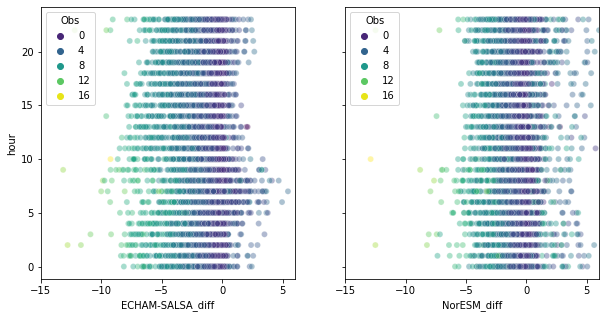

In [ ]:
fig, axs = plt.subplots(1,2,sharey=True, figsize=[10,5])
ax = axs[0]
_df = df_OA_incDiff
_df['hour'] = _df.index.hour
for mo, ax in zip(models,axs.flatten()):
    sns.scatterplot(x=f'{mo}_diff', y=f'hour',#orbins=bins_, alpha=0.5, 
                                     hue=f'Obs', 
                #col = 'dir',
                ax=ax,
                alpha=0.4,
                palette='viridis',
                
                edgecolors=None,
                data = _df)

    #ax.set_yscale('log')
    # ax.set_xscale('symlog')
    ax.set_xlim([-15,6])
    #ax.set_ylim([0.1,30])

    #ax.set_xlabel(f'{mo} OA '+'[$\mu$gm$^{-3}$]')
    #ax.set_ylabel('Observed OA [$\mu$gm$^{-3}$]')



    lims = ax.get_xlim()
    #ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

ECHAM-SALSA
NorESM


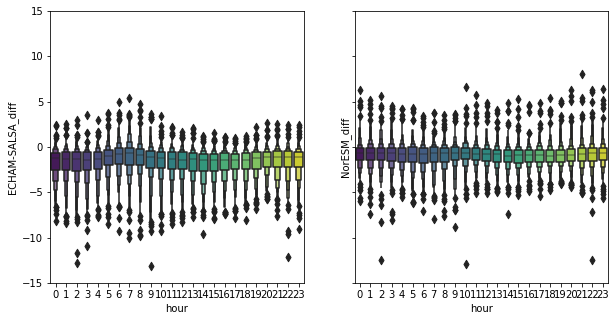

ECHAM-SALSA
NorESM


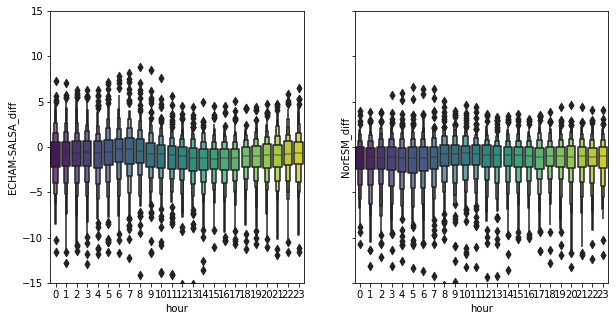

In [459]:
for st in stations:
    df_OA_all = dic_df_OA_all[st]
    _diff = (df_OA_all.drop(['Obs'],axis=1).T - df_OA_all['Obs']).T

    df_OA_incDiff = df_OA_all.copy()

    for mo in _diff.columns:
        print(mo)
        df_OA_incDiff[f'{mo}_diff'] = _diff[mo]
    fig, axs = plt.subplots(1,2,sharey=True, figsize=[10,5])
    ax = axs[0]
    _df = df_OA_incDiff
    _df['hour'] = _df.index.hour
    for mo, ax in zip(models,axs.flatten()):
        sns.boxenplot(y=f'{mo}_diff', x=f'hour',#orbins=bins_, alpha=0.5, 
                                     #hue=f'Obs', 
                #col = 'dir',
                ax=ax,
                #alpha=0.4,
                palette='viridis',
                
                #edgecolors=None,
                data = _df)


    lims = ax.get_xlim()

    ax.set_ylim([-15,15])
    plt.show()
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

ECHAM-SALSA
NorESM


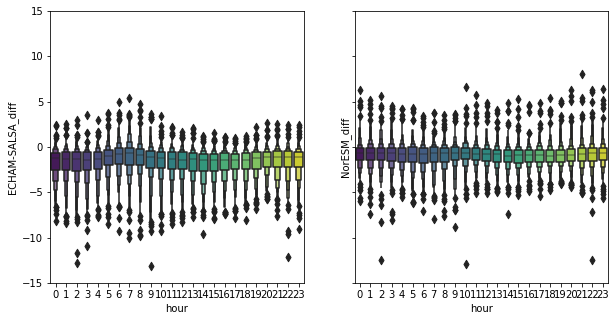

ECHAM-SALSA
NorESM


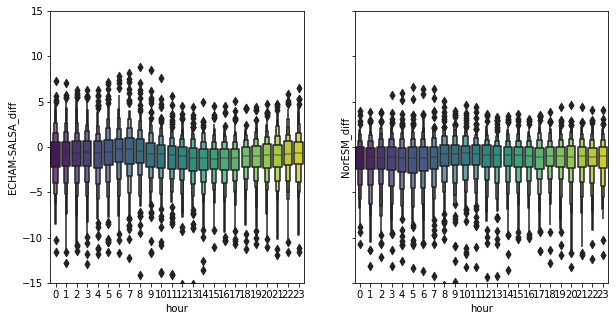

In [459]:
for st in stations:
    df_OA_all = dic_df_OA_all[st]
    _diff = (df_OA_all.drop(['Obs'],axis=1).T - df_OA_all['Obs']).T

    df_OA_incDiff = df_OA_all.copy()

    for mo in _diff.columns:
        print(mo)
        df_OA_incDiff[f'{mo}_diff'] = _diff[mo]
    fig, axs = plt.subplots(1,2,sharey=True, figsize=[10,5])
    ax = axs[0]
    _df = df_OA_incDiff
    _df['hour'] = _df.index.hour
    for mo, ax in zip(models,axs.flatten()):
        sns.boxenplot(y=f'{mo}_diff', x=f'hour',#orbins=bins_, alpha=0.5, 
                                     #hue=f'Obs', 
                #col = 'dir',
                ax=ax,
                #alpha=0.4,
                palette='viridis',
                
                #edgecolors=None,
                data = _df)


    lims = ax.get_xlim()

    ax.set_ylim([-15,15])
    plt.show()
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [556]:
df

,Org,SO4,NO3,NH4,Chl
time,,,,,
2012-03-28 04:00:00,0.721564,0.038309,0.049676,-0.120327,0.025994
2012-03-28 05:00:00,0.632952,0.012090,0.005644,0.077941,0.005327
2012-03-28 06:00:00,-0.168610,0.019267,0.032799,-0.009839,0.023005
2012-03-28 07:00:00,0.619241,0.061451,-0.005805,0.006860,0.007589
2012-03-28 08:00:00,0.653307,0.094780,0.044938,0.095935,-0.015298
...,...,...,...,...,...
2020-04-01 20:00:00,0.012743,0.157964,0.015519,0.054442,-0.002965
2020-04-01 21:00:00,0.215876,0.105099,0.032236,-0.029902,-0.004037
2020-04-01 22:00:00,0.353981,0.232865,0.020376,0.113965,-0.000570


In [ ]:
plt.ylim([0,8])

In [525]:
len(df_lii['Org'][df_lii['Org']<0])#.plot()

723

In [557]:
obs_hyy_s = df_lii[(df_lii.index.month==7) |(df_lii.index.month==8)]

In [558]:
df = obs_hyy_s

In [559]:
df.columns

Index(['Org', 'SO4', 'NO3', 'NH4', 'Chl'], dtype='object')

In [562]:
_df = df[['Org', 'SO4', 'NO3', 'NH4', 'Chl']].copy()


_df_q = _df.quantile([.05,.5,.95])
div = _df_q.loc[.95,:]-_df_q.loc[.05,:]

_df = (_df-_df_q.loc[.5,:])/div

_df= _df.dropna()

data = _df.values


N = 7

from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state = 1,init='random')
la = km.fit_predict(data)

df_wlab = df.copy().loc[_df.index]

df_wlab['lab'] = la

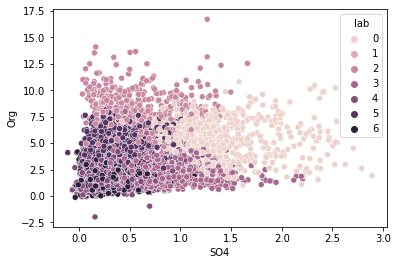

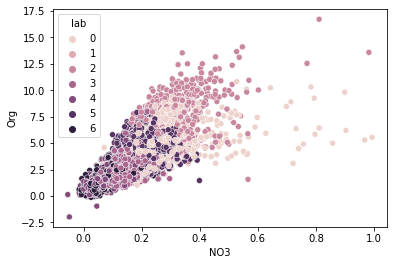

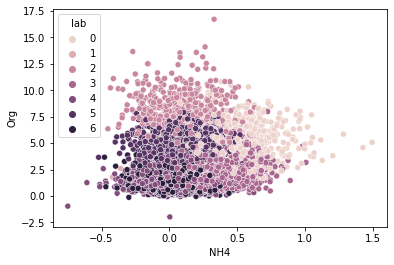

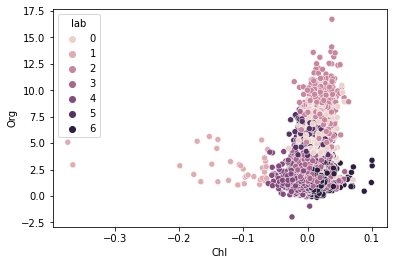

In [573]:
for x in ['SO4', 'NO3', 'NH4', 'Chl']:
    sns.scatterplot(data = df_wlab, hue='lab',x=x, y= 'Org',)
    plt.show()

In [791]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

ValueError: could not convert string to float: 'Chl'

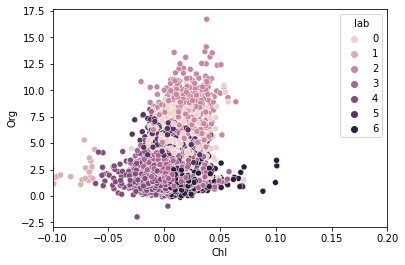

In [570]:
    sns.scatterplot(data = df_wlab, hue='lab',x='Chl', y= 'Org',)
    plt.xlim([-.1,.2])
    plt.show()

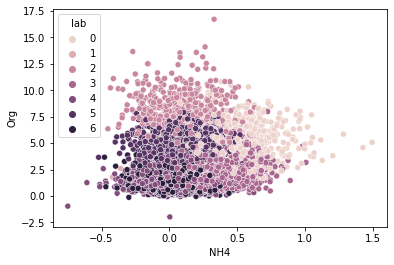

In [572]:
    sns.scatterplot(data = df_wlab, hue='lab',x='NH4', y= 'Org',)
    plt.show()

(0.0, 7.0)

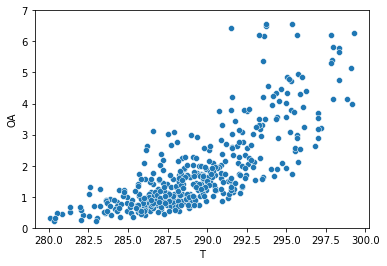

In [792]:
dfm = dic_st_mod_ca['SMR']['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp'].drop(['station','lev']).to_dataframe()
dfmd = dfm.resample('d').median()

dfmdm= dfmd[(dfmd.index.month>=7 ) & (dfmd.index.month<=8 )]

sns.scatterplot(data = dfmdm, x='T',y= 'OA')
plt.ylim([0,7])

(0.0, 7.0)

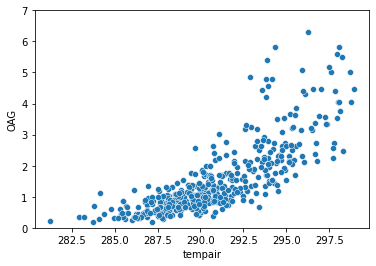

In [793]:
dfm = dic_st_mod_ca['SMR']['ECHAM-SALSA']['SALSA_BSOA_feedback'].isel(lev=-1).to_dataframe()
dfmd = dfm.resample('d').median()

dfmdm= dfmd[(dfmd.index.month>=7 ) & (dfmd.index.month<=8 )]

sns.scatterplot(data = dfmdm, x='tempair',y= 'OAG')
plt.ylim([0,7])

(290.0, 315.0)

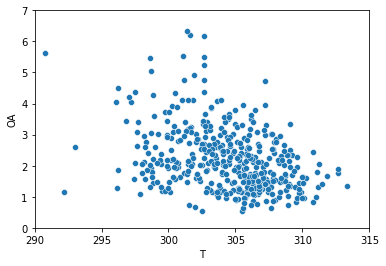

In [794]:
dfm = dic_st_mod_ca['SGP']['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp'].drop(['station','lev']).to_dataframe()
dfmd = dfm.resample('d').median()

dfmdm= dfmd[(dfmd.index.month>=7 ) & (dfmd.index.month<=8 )]

sns.scatterplot(data = dfmdm, x='T',y= 'OA')
plt.ylim([0,7])
plt.ylim([0,7])
plt.xlim([290,315])

(290.0, 315.0)

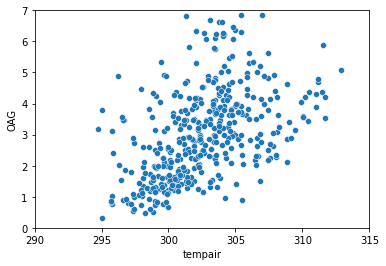

In [795]:
dfm = dic_st_mod_ca['SGP']['ECHAM-SALSA']['SALSA_BSOA_feedback'].isel(lev=-1).to_dataframe()
dfmd = dfm.resample('d').median()

dfmdm= dfmd[(dfmd.index.month>=7 ) & (dfmd.index.month<=8 )]

sns.scatterplot(data = dfmdm, x='tempair',y= 'OAG')
plt.ylim([0,7])
plt.ylim([0,7])
plt.xlim([290,315])

In [796]:
measurements_path

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data')

In [797]:
import xarray as xr
from pathlib import Path 

# %%
fn = measurements_path / 'ARM_data' / 'metdata_clean' / 'SGP_metdata_sgparmbeatmC1.c1_2013-2018.nc'
ds_T = xr.open_dataset(fn)

,temperature_sfc,relative_humidity_sfc,pressure_sfc,u_wind_sfc,v_wind_sfc
time,,,,,
2013-07-01,294.315491,52.739754,980.474854,-1.357852,-3.198706
2013-07-02,295.033569,43.764580,981.744995,-0.705994,-2.298934
2013-07-03,294.803894,44.787006,980.694214,-1.761664,1.328316
2013-07-04,296.508881,42.167252,978.054932,-2.191843,3.337399
2013-07-05,295.943420,56.069538,976.271240,-2.866745,6.150736
...,...,...,...,...,...
2020-08-27,298.210266,71.725990,974.751709,-1.611043,3.456659
2020-08-28,300.276733,67.549164,971.377075,-1.439288,3.116325
2020-08-29,299.323822,73.418503,973.783447,-3.531234,-3.615111


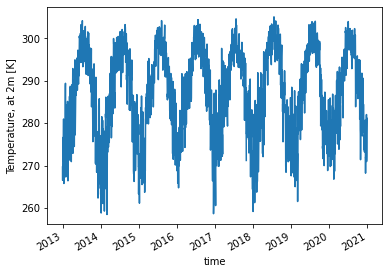

In [798]:
# %%
ds_T

# %%
ds_T_daily = ds_T[['temperature_sfc','relative_humidity_sfc','pressure_sfc','u_wind_sfc','v_wind_sfc']].resample({'time':'d'}).median()

# %%
ds_T_daily['temperature_sfc'].plot()

# %%
JA_month = (ds_T_daily['time.month']>=7) &(ds_T_daily['time.month']<=8)

# %%
ds_T_daily_sum = ds_T_daily.where(JA_month, drop=True)

# %%
df_T_daily_sum = ds_T_daily_sum.to_dataframe()
df_T_daily_sum

# %%

In [799]:
# %%
import pandas as pd

# %%

path_acsm_SGP =measurements_path / 'ARM_data' /'watson'/ 'ACSM'

#path_acsm_SGP = measurements_path/'ARM_data' /'watson'/'ACSM'


fl = list(path_acsm_SGP.glob('*.csv'))

fl.sort()

df_list = []
for f in fl:
    df_list.append(pd.read_csv(f, index_col=1))

_df_acsm_SGP = pd.concat(df_list)

_df_acsm_SGP.index = pd.to_datetime(_df_acsm_SGP.index)

df_acsm_SGP =  _df_acsm_SGP.resample('h').mean()

df_acsm_SGP.index = df_acsm_SGP.index.rename('time')

df_acsm_SGP

,Org,NO3,SO4,NH4,Chl
time,,,,,
2011-01-01 00:00:00,0.105956,0.229458,0.174238,0.236372,0.003515
2011-01-01 01:00:00,0.218333,0.167305,0.266792,0.065027,0.010757
2011-01-01 02:00:00,0.185362,0.215106,0.143831,0.135154,0.008068
2011-01-01 03:00:00,0.278828,0.216175,0.102955,0.061176,0.009538
2011-01-01 04:00:00,0.305227,0.206229,0.127528,0.126710,0.013873
...,...,...,...,...,...
2020-01-05 18:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-05 19:00:00,0.181320,0.020700,0.028657,-0.007856,0.002740
2020-01-05 20:00:00,0.145849,0.039624,0.023381,0.063025,0.002264


In [800]:
# %%
df_acsm_SGP['total'] =df_acsm_SGP.sum(axis=1) 
df_acsm_SGP['org_frac'] =df_acsm_SGP['Org']/ df_acsm_SGP['total']

# %%
df_acsm_SGP#['total']

,Org,NO3,SO4,NH4,Chl,total,org_frac
time,,,,,,,
2011-01-01 00:00:00,0.105956,0.229458,0.174238,0.236372,0.003515,0.749539,0.141361
2011-01-01 01:00:00,0.218333,0.167305,0.266792,0.065027,0.010757,0.728215,0.299820
2011-01-01 02:00:00,0.185362,0.215106,0.143831,0.135154,0.008068,0.687520,0.269610
2011-01-01 03:00:00,0.278828,0.216175,0.102955,0.061176,0.009538,0.668672,0.416987
2011-01-01 04:00:00,0.305227,0.206229,0.127528,0.126710,0.013873,0.779567,0.391533
...,...,...,...,...,...,...,...
2020-01-05 18:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2020-01-05 19:00:00,0.181320,0.020700,0.028657,-0.007856,0.002740,0.225561,0.803864
2020-01-05 20:00:00,0.145849,0.039624,0.023381,0.063025,0.002264,0.274144,0.532016


In [801]:
# %%
import datetime

# %%
ind = df_acsm_SGP.index 
df_acsm_SGP.index = ind + datetime.timedelta(hours=-6)

In [802]:
import matplotlib.pyplot as plt

# %%
df_acsm_SGP_daily = df_acsm_SGP.resample('d').median()

In [803]:
# %%
JA_month = (df_acsm_SGP_daily.index.month>=7) &(df_acsm_SGP_daily.index.month<=8)

# %%

df_acsm_SGP_daily_sum = df_acsm_SGP_daily[JA_month]

In [804]:
df_acsm_SGP_daily_sum.head()

,Org,NO3,SO4,NH4,Chl,total,org_frac
time,,,,,,,
2011-07-01,2.550340,0.140759,1.186157,0.282505,0.004904,4.108935,0.626840
2011-07-02,2.079157,0.118546,1.344383,0.275565,0.003641,3.808992,0.589255
2011-07-03,2.185787,0.157437,1.164373,0.278304,0.001816,3.750391,0.591753
2011-07-04,2.687850,0.179773,1.318360,0.282721,0.004655,4.851747,0.640232
2011-07-05,3.327605,0.225958,1.323242,0.312634,0.005207,5.455707,0.653820


In [805]:
df_acsm_SGP_daily_sum.tail()

,Org,NO3,SO4,NH4,Chl,total,org_frac
time,,,,,,,
2019-08-27,1.250675,0.089420,0.225260,0.076694,0.001483,1.650770,0.757973
2019-08-28,1.677655,0.149674,0.358909,0.155326,0.003411,2.285321,0.735126
2019-08-29,4.169650,0.261560,1.477415,0.483360,0.009560,6.505542,0.674157
2019-08-30,1.003836,0.066013,0.158253,0.054735,0.001403,1.288171,0.789153
2019-08-31,1.489502,0.110462,0.410888,0.160490,0.003645,2.239297,0.704183


In [806]:
# %%
df = pd.concat([df_T_daily_sum,df_acsm_SGP_daily_sum],axis=1).dropna()

# %%
df.columns

Index(['temperature_sfc', 'relative_humidity_sfc', 'pressure_sfc',
       'u_wind_sfc', 'v_wind_sfc', 'Org', 'NO3', 'SO4', 'NH4', 'Chl', 'total',
       'org_frac'],
      dtype='object')

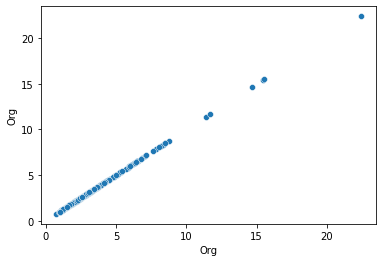

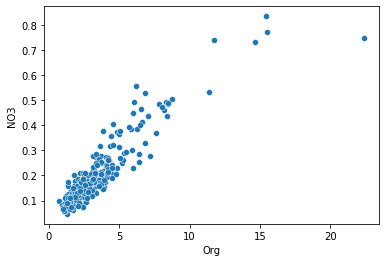

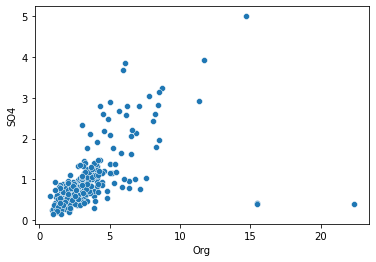

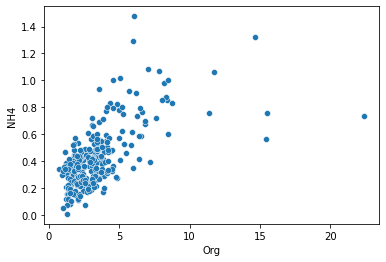

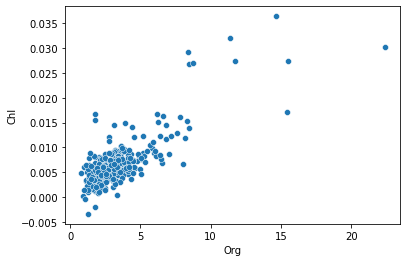

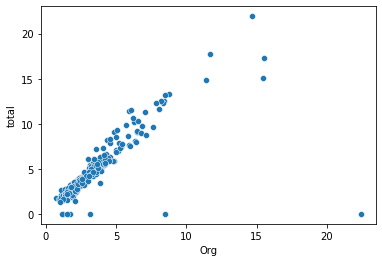

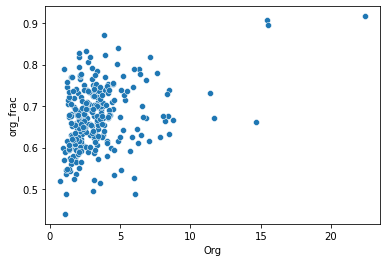

In [807]:
# %%
for y in [#'temperature_sfc', 'relative_humidity_sfc', 'pressure_sfc',
       #'u_wind_sfc', 'v_wind_sfc', 
          'Org', 'NO3', 'SO4', 'NH4', 'Chl', 'total',
       'org_frac']:
    sns.scatterplot(data=df, x='Org',y=y)
    plt.show()

# %%

Index(['temperature_sfc', 'relative_humidity_sfc', 'pressure_sfc',
       'u_wind_sfc', 'v_wind_sfc', 'Org', 'NO3', 'SO4', 'NH4', 'Chl', 'total',
       'org_frac'],
      dtype='object')

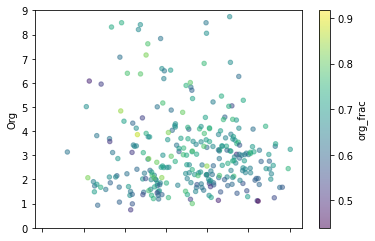

In [808]:
# %%
v = 'org_frac'

df[df[v]>=.3].plot.scatter(x='temperature_sfc', y='Org', ylim=[0,9], c=v, cmap='viridis', alpha=.5)

# %%
df.columns

In [809]:
# %%
_df.index

# %%
_df = df[['Org', 'NO3', 'SO4', 'NH4', 'Chl', 'total']].copy()
_df = ((_df.T/_df['total']).T).dropna()
data = _df.values


N = 7

from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state = 1,init='random')
la = km.fit_predict(data)

# %%
df

# %%

,temperature_sfc,relative_humidity_sfc,pressure_sfc,u_wind_sfc,v_wind_sfc,Org,NO3,SO4,NH4,Chl,total,org_frac
time,,,,,,,,,,,,
2013-07-01,294.315491,52.739754,980.474854,-1.357852,-3.198706,15.456692,0.833951,0.431282,0.564323,0.017032,15.078540,0.908356
2013-07-03,294.803894,44.787006,980.694214,-1.761664,1.328316,8.488263,0.485162,1.958755,0.598297,0.026814,0.000000,0.737874
2013-07-04,296.508881,42.167252,978.054932,-2.191843,3.337399,11.382100,0.531226,2.935085,0.756906,0.031959,14.882623,0.731907
2013-07-05,295.943420,56.069538,976.271240,-2.866745,6.150736,8.407590,0.435125,2.821235,0.857035,0.029228,12.479733,0.674911
2013-07-06,298.683563,51.470745,974.423828,-2.150024,6.079917,14.665575,0.732655,5.003707,1.319175,0.036396,21.928476,0.662650
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,297.648560,82.739655,978.232178,-1.792720,-3.943187,1.250675,0.089420,0.225260,0.076694,0.001483,1.650770,0.757973
2019-08-28,293.533813,77.911697,981.984375,-1.154856,-0.688019,1.677655,0.149674,0.358909,0.155326,0.003411,2.285321,0.735126
2019-08-29,298.065765,78.930672,978.574768,-0.967649,5.131554,4.169650,0.261560,1.477415,0.483360,0.009560,6.505542,0.674157


In [810]:
_df = df[['v_wind_sfc','u_wind_sfc','relative_humidity_sfc','pressure_sfc']].copy()


_df_q = _df.quantile([.05,.5,.95])
div = _df_q.loc[.95,:]-_df_q.loc[.05,:]

_df = (_df-_df_q.loc[.5,:])/div



data = _df.values


N = 7

from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state = 1,init='random')
la = km.fit_predict(data)

df_wlab = df.copy().loc[_df.index]

df_wlab['lab'] = la

In [811]:
import seaborn as sns

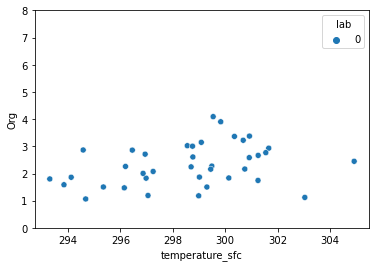

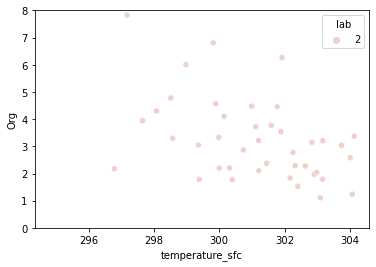

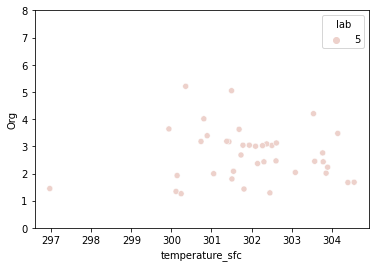

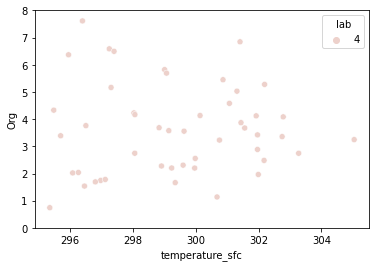

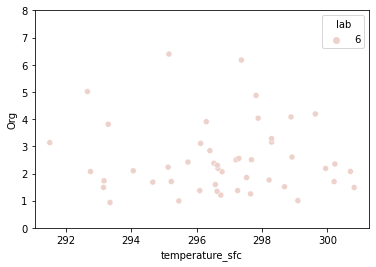

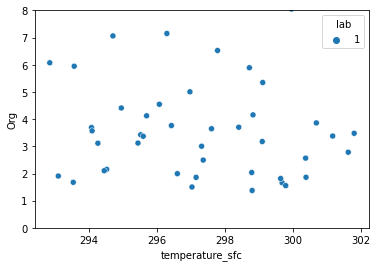

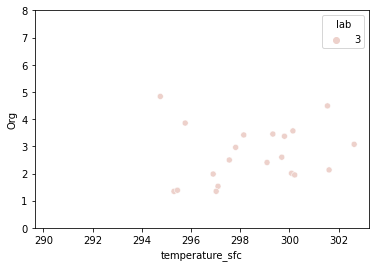

In [812]:
for la in df_wlab['lab'].unique():
    sns.scatterplot(data = df_wlab[df_wlab['lab']==la], hue='lab',x='temperature_sfc', y= 'Org',)
    plt.ylim([0,8])
    plt.show()

(290.0, 315.0)

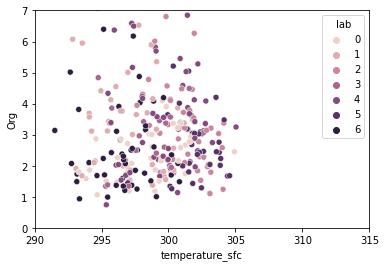

In [813]:
# %%
sns.scatterplot(data = df_wlab, hue='lab',y='Org', x= 'temperature_sfc',)
plt.ylim([0,7])
plt.xlim([290,315])

In [814]:
# %%
df_wlab[['Org','SO4','temperature_sfc']].cov()

,Org,SO4,temperature_sfc
Org,5.832504,0.979660,-1.393554
SO4,0.979660,0.499564,-0.006973
temperature_sfc,-1.393554,-0.006973,8.850022


(0.0, 8.0)

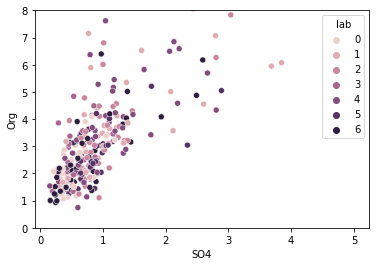

In [815]:
# %%
sns.scatterplot(data = df_wlab, hue='lab',x='SO4', y= 'Org',)
plt.ylim([0,8])

(0.0, 8.0)

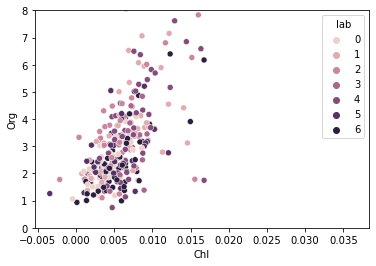

In [816]:
# %%
sns.scatterplot(data = df_wlab, hue='lab',x='Chl', y= 'Org',)
plt.ylim([0,8])

(0.0, 8.0)

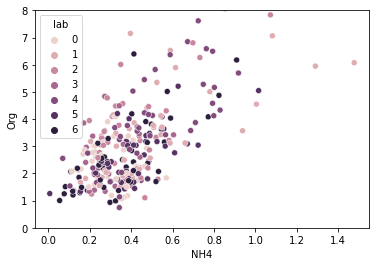

In [817]:
# %%
sns.scatterplot(data = df_wlab, hue='lab',x='NH4', y= 'Org',)
plt.ylim([0,8])

In [818]:
# %%
df_wlab

,temperature_sfc,relative_humidity_sfc,pressure_sfc,u_wind_sfc,v_wind_sfc,Org,NO3,SO4,NH4,Chl,total,org_frac,lab
time,,,,,,,,,,,,,
2013-07-01,294.315491,52.739754,980.474854,-1.357852,-3.198706,15.456692,0.833951,0.431282,0.564323,0.017032,15.078540,0.908356,0
2013-07-03,294.803894,44.787006,980.694214,-1.761664,1.328316,8.488263,0.485162,1.958755,0.598297,0.026814,0.000000,0.737874,2
2013-07-04,296.508881,42.167252,978.054932,-2.191843,3.337399,11.382100,0.531226,2.935085,0.756906,0.031959,14.882623,0.731907,2
2013-07-05,295.943420,56.069538,976.271240,-2.866745,6.150736,8.407590,0.435125,2.821235,0.857035,0.029228,12.479733,0.674911,2
2013-07-06,298.683563,51.470745,974.423828,-2.150024,6.079917,14.665575,0.732655,5.003707,1.319175,0.036396,21.928476,0.662650,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,297.648560,82.739655,978.232178,-1.792720,-3.943187,1.250675,0.089420,0.225260,0.076694,0.001483,1.650770,0.757973,6
2019-08-28,293.533813,77.911697,981.984375,-1.154856,-0.688019,1.677655,0.149674,0.358909,0.155326,0.003411,2.285321,0.735126,1
2019-08-29,298.065765,78.930672,978.574768,-0.967649,5.131554,4.169650,0.261560,1.477415,0.483360,0.009560,6.505542,0.674157,4


<AxesSubplot:xlabel='temperature_sfc', ylabel='Org'>

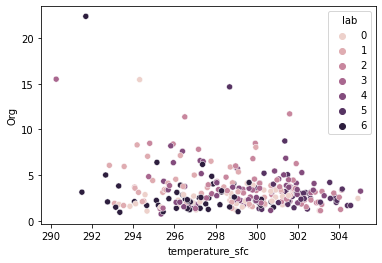

In [819]:
# %%
sns.scatterplot(data = df_wlab, hue='lab',x='temperature_sfc', y= 'Org',)

<AxesSubplot:xlabel='temperature_sfc', ylabel='Org'>

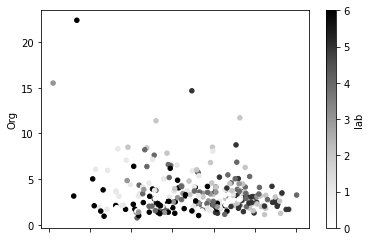

In [820]:
# %%
df_wlab.plot.scatter(x='temperature_sfc', y= 'Org', c='lab')

# %%

# %%

In [821]:
df_wlab

,temperature_sfc,relative_humidity_sfc,pressure_sfc,u_wind_sfc,v_wind_sfc,Org,NO3,SO4,NH4,Chl,total,org_frac,lab
time,,,,,,,,,,,,,
2013-07-01,294.315491,52.739754,980.474854,-1.357852,-3.198706,15.456692,0.833951,0.431282,0.564323,0.017032,15.078540,0.908356,0
2013-07-03,294.803894,44.787006,980.694214,-1.761664,1.328316,8.488263,0.485162,1.958755,0.598297,0.026814,0.000000,0.737874,2
2013-07-04,296.508881,42.167252,978.054932,-2.191843,3.337399,11.382100,0.531226,2.935085,0.756906,0.031959,14.882623,0.731907,2
2013-07-05,295.943420,56.069538,976.271240,-2.866745,6.150736,8.407590,0.435125,2.821235,0.857035,0.029228,12.479733,0.674911,2
2013-07-06,298.683563,51.470745,974.423828,-2.150024,6.079917,14.665575,0.732655,5.003707,1.319175,0.036396,21.928476,0.662650,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,297.648560,82.739655,978.232178,-1.792720,-3.943187,1.250675,0.089420,0.225260,0.076694,0.001483,1.650770,0.757973,6
2019-08-28,293.533813,77.911697,981.984375,-1.154856,-0.688019,1.677655,0.149674,0.358909,0.155326,0.003411,2.285321,0.735126,1
2019-08-29,298.065765,78.930672,978.574768,-0.967649,5.131554,4.169650,0.261560,1.477415,0.483360,0.009560,6.505542,0.674157,4


                      Org  temperature_sfc
Org              1.000000        -0.193965
temperature_sfc -0.193965         1.000000
          OA         T
OA  1.000000 -0.293485
T  -0.293485  1.000000
               ORG_mass_conc   tempair
ORG_mass_conc       1.000000  0.296672
tempair             0.296672  1.000000


Text(0, 0.5, 'OA [$\\mu$g/m$^3$]')

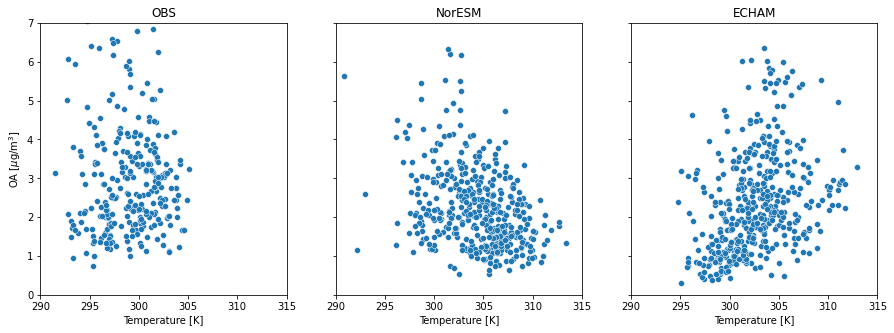

In [832]:
# %%
fig, axs = plt.subplots(1,3, figsize=[15,5], sharex=True, sharey=True)
ax = axs[0]
sns.scatterplot(data = df_wlab,x='temperature_sfc', y= 'Org',ax = axs[0])
ax.set_ylim([0,7])
ax.set_xlim([290,315])
ax.set_title('OBS')
_df =df_wlab[['Org','temperature_sfc']]
print(_df.corr())
ax = axs[1]
dfm = dic_st_mod_ca['SGP']['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp'].drop(['station','lev']).to_dataframe()
dfmd = dfm.resample('d').median()

dfmdm= dfmd[(dfmd.index.month>=7 ) & (dfmd.index.month<=8 )]

sns.scatterplot(data = dfmdm, x='T',y= 'OA', ax = ax)
ax.set_title('NorESM')

_df =dfmdm[['OA','T']]
print(_df.corr())
ax = axs[2]

dfm = dic_st_mod_ca['SGP']['ECHAM-SALSA']['SALSA_BSOA_feedback'].isel(lev=-1).to_dataframe()
dfmd = dfm.resample('d').median()

dfmdm= dfmd[(dfmd.index.month>=7 ) & (dfmd.index.month<=8 )]

sns.scatterplot(data = dfmdm, x='tempair',y= 'ORG_mass_conc', ax= ax)
ax.set_title('ECHAM')

_df =dfmdm[['ORG_mass_conc','tempair']]
print(_df.corr())
for ax in axs:
    ax.set_xlabel('Temperature [K]')

axs[0].set_ylabel('OA [$\mu$g/m$^3$]')

In [828]:
dfmdm['ORG_mass_conc

,lon,lev,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,SABIN_gas,...,N50,N100,N200,N250,N500,ORG_mass_conc,VBS1_gas_conc,VBS0_gas_conc,VBS10_gas_conc,OAG
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01,-97.487,47.0,4.149980e-12,2.924622e-12,6.089590e-13,3.226922e-10,1.511578e-12,7.475005e-13,2.704805e-09,7.079134e-13,...,3253.030029,1355.680786,129.692047,84.836182,5.238972,3.449571,0.170815,0.000128,1.479052,5.017029
2012-07-02,-97.487,47.0,4.174359e-12,2.901100e-12,5.953245e-13,2.258902e-10,1.504252e-12,7.503283e-13,8.829484e-10,7.114979e-13,...,3187.212891,343.333344,56.243744,36.913780,3.409001,1.126068,0.106709,0.000443,0.897855,2.190379
2012-07-03,-97.487,47.0,4.671218e-12,3.029396e-12,6.125961e-13,2.260284e-10,1.577996e-12,8.465756e-13,1.219798e-09,7.994528e-13,...,3243.335449,346.911591,87.914124,59.221680,7.069112,1.555669,0.063539,0.000393,0.709145,2.248750
2012-07-04,-97.487,47.0,4.303257e-12,2.735595e-12,5.530461e-13,2.586027e-10,1.423787e-12,7.817378e-13,1.149211e-09,7.393613e-13,...,3534.421387,373.249817,89.817017,59.542675,5.581157,1.465645,0.085876,0.000406,1.066015,2.623839
2012-07-05,-97.487,47.0,4.901564e-12,3.077309e-12,6.242930e-13,3.024146e-10,1.595712e-12,8.780827e-13,1.267641e-09,8.346211e-13,...,2686.930908,493.095673,86.296967,56.558949,5.280980,1.616685,0.095315,0.000489,1.101903,2.702484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27,-97.487,47.0,3.550064e-12,2.826736e-12,7.054187e-13,2.684216e-10,1.400217e-12,6.441319e-13,1.372197e-09,6.070965e-13,...,2494.392334,302.225220,61.433140,44.244690,4.635650,1.750031,0.115856,0.000310,0.748567,2.678827
2018-08-28,-97.487,47.0,3.583241e-12,2.246486e-12,5.751596e-13,1.997370e-10,1.138203e-12,6.471763e-13,1.147137e-09,6.118759e-13,...,3021.340820,256.783722,47.326309,31.729216,3.833004,1.463000,0.108264,0.000286,0.518309,2.032840
2018-08-29,-97.487,47.0,7.342156e-12,6.327780e-12,1.608146e-12,2.249584e-10,3.138348e-12,1.346928e-12,1.284604e-09,1.264363e-12,...,4084.174316,357.614258,39.376160,26.277485,2.622931,1.638319,0.142774,0.000171,0.662619,2.310168


In [831]:
_df =dfmdm[['ORG_mass_conc','tempair']]
print(_df.corr())

               ORG_mass_conc   tempair
ORG_mass_conc       1.000000  0.296672
tempair             0.296672  1.000000


(290.0, 315.0)

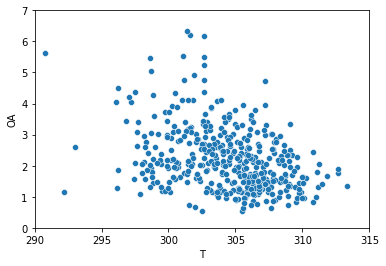

In [823]:
dfm = dic_st_mod_ca['SGP']['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp'].drop(['station','lev']).to_dataframe()
dfmd = dfm.resample('d').median()

dfmdm= dfmd[(dfmd.index.month>=7 ) & (dfmd.index.month<=8 )]

sns.scatterplot(data = dfmdm, x='T',y= 'OA')
plt.ylim([0,7])
plt.ylim([0,7])
plt.xlim([290,315])

(290.0, 315.0)

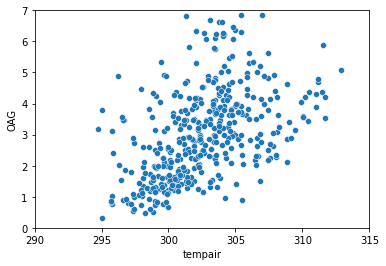

In [824]:
dfm = dic_st_mod_ca['SGP']['ECHAM-SALSA']['SALSA_BSOA_feedback'].isel(lev=-1).to_dataframe()
dfmd = dfm.resample('d').median()

dfmdm= dfmd[(dfmd.index.month>=7 ) & (dfmd.index.month<=8 )]

sns.scatterplot(data = dfmdm, x='tempair',y= 'OAG')
plt.ylim([0,7])
plt.ylim([0,7])
plt.xlim([290,315])